#**Tech_challenge_DATASETS DE PNAD-COVID**
##### **A base foi extraída neste site, conforme** **solicatado no tech challenge :** https://www.ibge.gov.br/estatisticas/investigacoes-experimentais/estatisticas-experimentais/27946-divulgacao-semanal-pnadcovid1?t=downloads&utm_source=covid19&utm_medium=hotsite&utm_campaign=covid_19


# **Data Manipulation using Spark**

# 1. Instalando a biblioteca PySpark

In [ ]:
!pip install pyspark

In [ ]:
!pip install findspark

#2. Importando Biblioteca PySpark

In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

#3. Tabela Fato
Para a construção da tabela fato, considerou-se os dados dos últimos três meses (Setembro, Outubro e Novembro). Além disso, escolheu-se 20 questionamentos da pesquisa PNAD_COVID_19, com base nos seguintes aspectos:

- Caracterização dos sintomas clínicos da população;
- Comportamento da população na época da COVID-19;
- Características econômicas da Sociedade.

##3.1.  Importando  spark libraries

In [ ]:
from pyspark.sql import Row, DataFrame
from pyspark.sql.types import StringType, StructType, StructField, IntegerType
from pyspark.sql.functions import col, expr, lit, substring, concat, concat_ws, when, coalesce
from pyspark.sql import functions as F # for more sql functions
from functools import reduce

##3.2.  Consolidando os Datasets  
PNAD_COVID_092020/PNAD_COVID_102020/PNAD_COVID_112020

In [ ]:
df_pnad_covid_0920 = spark.read.csv('/content/sample_data/PNAD_COVID_092020.csv', sep = ',', inferSchema = True, header = True)

In [ ]:
df_pnad_covid_0920.describe().show()

+-------+--------------------+------------------+------------------+------------------+-----------------+------------------+------+------+-----------------+--------------------+-------------------+------------------+-----------------+------------------+------------------+------------------+------------------+-----------------+----------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-------------------+-------------------+------------------+-------------------+------------------+-------------------+-------------------+------------------+------------------+-------------------+-------------------+-------------------+------------------+------------------+------------------+------------------+-------------------+------------------+------------------+------------------+------------------+------------------+-

**Analisando os dados da tabela**


In [ ]:
print('Total de linhas:', df_pnad_covid_0920.count())
print('Total de colunas:', len(df_pnad_covid_0920.columns))
print('Tipo de dados:', df_pnad_covid_0920.dtypes)

Total de linhas: 387298
Total de colunas: 145
Tipo de dados: [('Ano', 'int'), ('UF', 'int'), ('CAPITAL', 'int'), ('RM_RIDE', 'int'), ('V1008', 'int'), ('V1012', 'int'), ('V1013', 'int'), ('V1016', 'int'), ('Estrato', 'int'), ('UPA', 'int'), ('V1022', 'int'), ('V1023', 'int'), ('V1030', 'int'), ('V1031', 'double'), ('V1032', 'double'), ('posest', 'int'), ('A001', 'int'), ('A001A', 'int'), ('A001B1', 'int'), ('A001B2', 'int'), ('A001B3', 'int'), ('A002', 'int'), ('A003', 'int'), ('A004', 'int'), ('A005', 'int'), ('A006', 'int'), ('A007', 'int'), ('A008', 'int'), ('A009', 'int'), ('B0011', 'int'), ('B0012', 'int'), ('B0013', 'int'), ('B0014', 'int'), ('B0015', 'int'), ('B0016', 'int'), ('B0017', 'int'), ('B0018', 'int'), ('B0019', 'int'), ('B00110', 'int'), ('B00111', 'int'), ('B00112', 'int'), ('B00113', 'int'), ('B002', 'int'), ('B0031', 'int'), ('B0032', 'int'), ('B0033', 'int'), ('B0034', 'int'), ('B0035', 'int'), ('B0036', 'int'), ('B0037', 'int'), ('B0041', 'int'), ('B0042', 'int'),

In [ ]:
print('df_pnad_covid_0920 schema 1:')
df_pnad_covid_0920.printSchema()

df_pnad_covid_0920 schema 1:
root
 |-- Ano: integer (nullable = true)
 |-- UF: integer (nullable = true)
 |-- CAPITAL: integer (nullable = true)
 |-- RM_RIDE: integer (nullable = true)
 |-- V1008: integer (nullable = true)
 |-- V1012: integer (nullable = true)
 |-- V1013: integer (nullable = true)
 |-- V1016: integer (nullable = true)
 |-- Estrato: integer (nullable = true)
 |-- UPA: integer (nullable = true)
 |-- V1022: integer (nullable = true)
 |-- V1023: integer (nullable = true)
 |-- V1030: integer (nullable = true)
 |-- V1031: double (nullable = true)
 |-- V1032: double (nullable = true)
 |-- posest: integer (nullable = true)
 |-- A001: integer (nullable = true)
 |-- A001A: integer (nullable = true)
 |-- A001B1: integer (nullable = true)
 |-- A001B2: integer (nullable = true)
 |-- A001B3: integer (nullable = true)
 |-- A002: integer (nullable = true)
 |-- A003: integer (nullable = true)
 |-- A004: integer (nullable = true)
 |-- A005: integer (nullable = true)
 |-- A006: integer (

##3.4. Indentificando as colunas com muitos nulos

In [ ]:
null_counts_covid_0920 = df_pnad_covid_0920.select([F.count(F.when(F.col(c).isNull(), c)).alias(c) for c in df_pnad_covid_0920.columns])
null_counts_covid_0920.show()

+---+---+-------+-------+-----+-----+-----+-----+-------+---+-----+-----+-----+-----+-----+------+----+-----+------+------+------+----+----+----+----+------+------+------+------+-----+-----+-----+-----+-----+-----+-----+-----+-----+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+----+----+------+------+------+------+------+------+-----+-----+-----+-----+-----+-----+----+-----+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+-------+-------+------+-------+-------+------+------+------+------+------+------+-----+------+-----+------+-----+------+-----+------+-----+------+-----+------+-----+------+----+------+------+------+------+----+------+------+------+------+------+------+------+-----+-----+
|Ano| UF|CAPITAL|RM_RIDE|V1008|V1012|V10

##3.5. Selecionando 20 questionamentos


In [ ]:
df_pnad_covid_0920 = df_pnad_covid_0920.select(*['Ano',F.lit(9).alias('Mes'),'UF', 'V1022','A002','A003','A004','A005','B0011','B0012','B0014','B00111','B007','B008','B0102','B0103','B0104','B0106','B011','D0051','D0061','E001'])
df_pnad_covid_0920.show(10)

+----+---+---+-----+----+----+----+----+-----+-----+-----+------+----+----+-----+-----+-----+-----+----+-----+-----+----+
| Ano|Mes| UF|V1022|A002|A003|A004|A005|B0011|B0012|B0014|B00111|B007|B008|B0102|B0103|B0104|B0106|B011|D0051|D0061|E001|
+----+---+---+-----+----+----+----+----+-----+-----+-----+------+----+----+-----+-----+-----+-----+----+-----+-----+----+
|2020|  9| 11|    1|  36|   1|   4|   5|    2|    2|    2|     2|   1|   2|    2|    2|    2|    2|   2|    1|    2|   3|
|2020|  9| 11|    1|  30|   2|   4|   7|    2|    2|    2|     2|   2|   2|    2|    2|    2|    2|   2|    1|    2|   3|
|2020|  9| 11|    1|  13|   1|   4|   2|    2|    2|    2|     2|   1|   2|    2|    2|    2|    2|   4|    1|    2|   3|
|2020|  9| 11|    1|  11|   1|   4|   2|    2|    2|    2|     2|   1|   2|    2|    2|    2|    2|   4|    1|    2|   3|
|2020|  9| 11|    1|  57|   2|   1|   2|    2|    2|    2|     2|   2|   2|    2|    2|    2|    2|   2|    2|    2|   3|
|2020|  9| 11|    1|  58

##3.6. Replicando os passos anteriores nos datasets dos meses 10 e 11

In [ ]:
df_pnad_covid_1020 = spark.read.csv('/content/sample_data/PNAD_COVID_102020.csv', sep = ',', inferSchema = True, header = True)
print('Total de linhas:', df_pnad_covid_1020 .count())
print('Total de colunas:', len(df_pnad_covid_1020 .columns))
print('Tipo de dados:', df_pnad_covid_1020 .dtypes)

Total de linhas: 380461
Total de colunas: 145
Tipo de dados: [('Ano', 'int'), ('UF', 'int'), ('CAPITAL', 'int'), ('RM_RIDE', 'int'), ('V1008', 'int'), ('V1012', 'int'), ('V1013', 'int'), ('V1016', 'int'), ('Estrato', 'int'), ('UPA', 'int'), ('V1022', 'int'), ('V1023', 'int'), ('V1030', 'int'), ('V1031', 'double'), ('V1032', 'double'), ('posest', 'int'), ('A001', 'int'), ('A001A', 'int'), ('A001B1', 'int'), ('A001B2', 'int'), ('A001B3', 'int'), ('A002', 'int'), ('A003', 'int'), ('A004', 'int'), ('A005', 'int'), ('A006', 'int'), ('A007', 'int'), ('A008', 'int'), ('A009', 'int'), ('B0011', 'int'), ('B0012', 'int'), ('B0013', 'int'), ('B0014', 'int'), ('B0015', 'int'), ('B0016', 'int'), ('B0017', 'int'), ('B0018', 'int'), ('B0019', 'int'), ('B00110', 'int'), ('B00111', 'int'), ('B00112', 'int'), ('B00113', 'int'), ('B002', 'int'), ('B0031', 'int'), ('B0032', 'int'), ('B0033', 'int'), ('B0034', 'int'), ('B0035', 'int'), ('B0036', 'int'), ('B0037', 'int'), ('B0041', 'int'), ('B0042', 'int'),

In [ ]:
null_counts_covid_1020 = df_pnad_covid_1020.select([F.count(F.when(F.col(c).isNull(), c)).alias(c) for c in df_pnad_covid_1020.columns])
null_counts_covid_1020.show()

+---+---+-------+-------+-----+-----+-----+-----+-------+---+-----+-----+-----+-----+-----+------+----+-----+------+------+------+----+----+----+----+------+------+------+------+-----+-----+-----+-----+-----+-----+-----+-----+-----+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+----+----+------+------+------+------+------+------+-----+-----+-----+-----+-----+-----+----+-----+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+-------+-------+------+-------+-------+------+------+------+------+------+------+-----+------+-----+------+-----+------+-----+------+-----+------+-----+------+-----+------+----+------+------+------+------+----+------+------+------+------+------+------+------+-----+-----+
|Ano| UF|CAPITAL|RM_RIDE|V1008|V1012|V10

In [ ]:
df_pnad_covid_1020 = df_pnad_covid_1020.select(*['Ano',F.lit(10).alias('Mes'),'UF', 'V1022','A002','A003','A004','A005','B0011','B0012','B0014','B00111','B007','B008','B0102','B0103','B0104','B0106','B011','D0051','D0061','E001'])
df_pnad_covid_1020.show(10)

+----+---+---+-----+----+----+----+----+-----+-----+-----+------+----+----+-----+-----+-----+-----+----+-----+-----+----+
| Ano|Mes| UF|V1022|A002|A003|A004|A005|B0011|B0012|B0014|B00111|B007|B008|B0102|B0103|B0104|B0106|B011|D0051|D0061|E001|
+----+---+---+-----+----+----+----+----+-----+-----+-----+------+----+----+-----+-----+-----+-----+----+-----+-----+----+
|2020| 10| 11|    1|  36|   1|   4|   5|    2|    2|    2|     2|   1|   2|    2|    2|    2|    2|   2|    1|    2|   3|
|2020| 10| 11|    1|  30|   2|   4|   7|    2|    2|    2|     2|   2|   2|    2|    2|    2|    2|   2|    1|    2|   3|
|2020| 10| 11|    1|  13|   1|   4|   2|    2|    2|    2|     2|   1|   2|    2|    2|    2|    2|   4|    1|    2|   3|
|2020| 10| 11|    1|  11|   1|   4|   2|    2|    2|    2|     2|   1|   2|    2|    2|    2|    2|   4|    1|    2|   3|
|2020| 10| 11|    1|  57|   2|   1|   2|    2|    2|    2|     2|   2|   2|    2|    2|    2|    2|   3|    2|    2|   3|
|2020| 10| 11|    1|  58

In [ ]:
df_pnad_covid_1120 = spark.read.csv('/content/sample_data/PNAD_COVID_112020.csv', sep = ',', inferSchema = True, header = True)
print('Total de linhas:', df_pnad_covid_1120 .count())
print('Total de colunas:', len(df_pnad_covid_1120 .columns))
print('Tipo de dados:', df_pnad_covid_1120 .dtypes)

Total de linhas: 381438
Total de colunas: 148
Tipo de dados: [('Ano', 'int'), ('UF', 'int'), ('CAPITAL', 'int'), ('RM_RIDE', 'int'), ('V1008', 'int'), ('V1012', 'int'), ('V1013', 'int'), ('V1016', 'int'), ('Estrato', 'int'), ('UPA', 'int'), ('V1022', 'int'), ('V1023', 'int'), ('V1030', 'int'), ('V1031', 'double'), ('V1032', 'double'), ('posest', 'int'), ('A001', 'int'), ('A001A', 'int'), ('A001B1', 'int'), ('A001B2', 'int'), ('A001B3', 'int'), ('A002', 'int'), ('A003', 'int'), ('A004', 'int'), ('A005', 'int'), ('A006', 'int'), ('A006A', 'int'), ('A006B', 'int'), ('A007', 'int'), ('A007A', 'int'), ('A008', 'int'), ('A009', 'int'), ('B0011', 'int'), ('B0012', 'int'), ('B0013', 'int'), ('B0014', 'int'), ('B0015', 'int'), ('B0016', 'int'), ('B0017', 'int'), ('B0018', 'int'), ('B0019', 'int'), ('B00110', 'int'), ('B00111', 'int'), ('B00112', 'int'), ('B00113', 'int'), ('B002', 'int'), ('B0031', 'int'), ('B0032', 'int'), ('B0033', 'int'), ('B0034', 'int'), ('B0035', 'int'), ('B0036', 'int'),

In [ ]:
null_counts_covid_1120 = df_pnad_covid_1120.select([F.count(F.when(F.col(c).isNull(), c)).alias(c) for c in df_pnad_covid_1120.columns])
null_counts_covid_1120.show()

+---+---+-------+-------+-----+-----+-----+-----+-------+---+-----+-----+-----+-----+-----+------+----+-----+------+------+------+----+----+----+----+------+------+------+------+------+------+------+-----+-----+-----+-----+-----+-----+-----+-----+-----+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+----+----+------+------+------+------+------+------+-----+-----+-----+-----+-----+-----+----+-----+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+-------+-------+------+-------+-------+------+------+------+------+------+------+-----+------+-----+------+-----+------+-----+------+-----+------+-----+------+-----+------+----+------+------+------+------+----+------+------+------+------+------+------+------+-----+-----+
|Ano| UF|CAPITAL|RM

In [ ]:
df_pnad_covid_1120 = df_pnad_covid_1120.select(*['Ano',F.lit(11).alias('Mes'),'UF', 'V1022','A002','A003','A004','A005','B0011','B0012','B0014','B00111','B007','B008','B0102','B0103','B0104','B0106','B011','D0051','D0061','E001'])
df_pnad_covid_1120.show(10)

+----+---+---+-----+----+----+----+----+-----+-----+-----+------+----+----+-----+-----+-----+-----+----+-----+-----+----+
| Ano|Mes| UF|V1022|A002|A003|A004|A005|B0011|B0012|B0014|B00111|B007|B008|B0102|B0103|B0104|B0106|B011|D0051|D0061|E001|
+----+---+---+-----+----+----+----+----+-----+-----+-----+------+----+----+-----+-----+-----+-----+----+-----+-----+----+
|2020| 11| 11|    1|  36|   1|   4|   5|    2|    2|    2|     2|   1|   2|    2|    2|    2|    2|   2|    1|    2|   3|
|2020| 11| 11|    1|  30|   2|   4|   7|    2|    2|    2|     2|   2|   2|    2|    2|    2|    2|   2|    1|    2|   3|
|2020| 11| 11|    1|  13|   1|   4|   2|    2|    2|    2|     2|   1|   2|    2|    2|    2|    2|   4|    1|    2|   3|
|2020| 11| 11|    1|  11|   1|   4|   2|    2|    2|    2|     2|   1|   2|    2|    2|    2|    2|   4|    1|    2|   3|
|2020| 11| 11|    1|  57|   2|   1|   2|    2|    2|    2|     2|   2|   2|    2|    2|    2|    2|   2|    2|    2|   3|
|2020| 11| 11|    1|  58

##3.7. Renomeando as três bases de dados afim de combiná-las

In [ ]:
df_pnad_covid_0920.createOrReplaceTempView("COVID_SET20")
df_pnad_covid_0920_check = spark.sql('''SELECT `Ano`,Mes, UF, `V1022` FROM COVID_SET20''')
df_pnad_covid_0920_check.show(5, truncate=False)

+----+---+---+-----+
|Ano |Mes|UF |V1022|
+----+---+---+-----+
|2020|9  |11 |1    |
|2020|9  |11 |1    |
|2020|9  |11 |1    |
|2020|9  |11 |1    |
|2020|9  |11 |1    |
+----+---+---+-----+
only showing top 5 rows



In [ ]:
df_pnad_covid_1020.createOrReplaceTempView("COVID_OCT20")
df_pnad_covid_1020_check = spark.sql('''SELECT `Ano`,Mes, UF, `V1022` FROM COVID_OCT20''')
df_pnad_covid_1020_check.show(5, truncate=False)

+----+---+---+-----+
|Ano |Mes|UF |V1022|
+----+---+---+-----+
|2020|10 |11 |1    |
|2020|10 |11 |1    |
|2020|10 |11 |1    |
|2020|10 |11 |1    |
|2020|10 |11 |1    |
+----+---+---+-----+
only showing top 5 rows



In [ ]:
df_pnad_covid_1120.createOrReplaceTempView("COVID_NOV20")
df_pnad_covid_1120_check = spark.sql('''SELECT `Ano`,Mes, UF, `V1022` FROM COVID_NOV20''')
df_pnad_covid_1120_check.show(5, truncate=False)

+----+---+---+-----+
|Ano |Mes|UF |V1022|
+----+---+---+-----+
|2020|11 |11 |1    |
|2020|11 |11 |1    |
|2020|11 |11 |1    |
|2020|11 |11 |1    |
|2020|11 |11 |1    |
+----+---+---+-----+
only showing top 5 rows



##3.8. Combinando as três bases dos meses de Setembro, Outubro e Novembro

**As colunas foram selecionadas com base nos critérios de relevância para a análise e pela baixa proporção de valores nulos, visando garantir uma maior acurácia analítica e reduzir o risco de vieses na tomada de decisão.**

In [ ]:
# Combina as três bases utilizando UNION ALL
query = """
SELECT * FROM COVID_SET20
UNION ALL
SELECT * FROM COVID_OCT20
UNION ALL
SELECT * FROM COVID_NOV20
"""

# Executa a consulta
tabfato_pnad_covid_1 = spark.sql(query)

# Exibe o resultado
tabfato_pnad_covid_1.show(10)

+----+---+---+-----+----+----+----+----+-----+-----+-----+------+----+----+-----+-----+-----+-----+----+-----+-----+----+
| Ano|Mes| UF|V1022|A002|A003|A004|A005|B0011|B0012|B0014|B00111|B007|B008|B0102|B0103|B0104|B0106|B011|D0051|D0061|E001|
+----+---+---+-----+----+----+----+----+-----+-----+-----+------+----+----+-----+-----+-----+-----+----+-----+-----+----+
|2020|  9| 11|    1|  36|   1|   4|   5|    2|    2|    2|     2|   1|   2|    2|    2|    2|    2|   2|    1|    2|   3|
|2020|  9| 11|    1|  30|   2|   4|   7|    2|    2|    2|     2|   2|   2|    2|    2|    2|    2|   2|    1|    2|   3|
|2020|  9| 11|    1|  13|   1|   4|   2|    2|    2|    2|     2|   1|   2|    2|    2|    2|    2|   4|    1|    2|   3|
|2020|  9| 11|    1|  11|   1|   4|   2|    2|    2|    2|     2|   1|   2|    2|    2|    2|    2|   4|    1|    2|   3|
|2020|  9| 11|    1|  57|   2|   1|   2|    2|    2|    2|     2|   2|   2|    2|    2|    2|    2|   2|    2|    2|   3|
|2020|  9| 11|    1|  58

In [ ]:
print('Total de linhas:', tabfato_pnad_covid_1.count())
print('Total de colunas:', len(tabfato_pnad_covid_1.columns))
print('Tipo de dados:', tabfato_pnad_covid_1.dtypes)

Total de linhas: 1149197
Total de colunas: 22
Tipo de dados: [('Ano', 'int'), ('Mes', 'int'), ('UF', 'int'), ('V1022', 'int'), ('A002', 'int'), ('A003', 'int'), ('A004', 'int'), ('A005', 'int'), ('B0011', 'int'), ('B0012', 'int'), ('B0014', 'int'), ('B00111', 'int'), ('B007', 'int'), ('B008', 'int'), ('B0102', 'int'), ('B0103', 'int'), ('B0104', 'int'), ('B0106', 'int'), ('B011', 'int'), ('D0051', 'int'), ('D0061', 'int'), ('E001', 'int')]


#4. Conectando as 20 tabelas dimensões com tabela fato


In [ ]:
import pyspark.sql.functions as f
from pyspark.sql.types import IntegerType, StringType

# Funções de transformação
def _get_uf(codigo):
    uf = {
        "11": "Rondônia", "12": "Acre", "13": "Amazonas", "14": "Roraima",
        "15": "Pará", "16": "Amapá", "17": "Tocantins", "21": "Maranhão",
        "22": "Piauí", "23": "Ceará", "24": "Rio Grande do Norte", "25": "Paraíba",
        "26": "Pernambuco", "27": "Alagoas", "28": "Sergipe", "29": "Bahia",
        "31": "Minas Gerais", "32": "Espírito Santo", "33": "Rio de Janeiro",
        "35": "São Paulo", "41": "Paraná", "42": "Santa Catarina",
        "43": "Rio Grande do Sul", "50": "Mato Grosso do Sul", "51": "Mato Grosso",
        "52": "Goiás", "53": "Distrito Federal"
    }
    return uf.get(str(codigo), 'NA')

def _get_area(codigo):
    area = {'1': 'Urbana', '2': 'Rural'}
    return area.get(str(codigo), 'NA')

def _get_idade(codigo):
    idade  = {
        range(0, 10): '0-9 anos',
        range(10, 20): '10-19 anos',
        range(20, 30): '20-29 anos',
        range(30, 40): '30-39 anos',
        range(40, 50): '40-49 anos',
        range(50, 60): '50-59 anos',
        range(60, 70): '60-69 anos',
        range(70, 80): '70-79 anos',
        range(80, 90): '80-89 anos',
        range(90, 100): '90-99 anos',
        range(100, 110): '100-109 anos',
        range(110, 121): '110-120 anos',
        range(121, 131): '121-130 anos'
    }
    for key, value in idade.items():
        if codigo in key:
            return value
    return idade.get(str(codigo), 'Fora do intervalo')

def _get_sexo(codigo):
    sexo = {'1': 'Masculino', '2': 'Feminino'}
    return sexo.get(str(codigo), 'NA')

def _get_cor_raca(codigo):
    cor_raca = {'1': 'Branca', '2': 'Preta', '3': 'Amarela', '4': 'Parda', '5': 'Indígena', '9': 'Ignorado'}
    return cor_raca.get(str(codigo), 'NA')

def _get_escolaridade(codigo):
    escolaridade = {
        '1': 'Sem instrução', '2': 'Fundamental incompleto', '3': 'Fundamental completa',
        '4': 'Médio incompleto', '5': 'Médio completo', '6': 'Superior incompleto',
        '7': 'Superior completo', '8': 'Pós-graduação, mestrado ou doutorado'
    }
    return escolaridade.get(str(codigo), 'NA')

def _get_febre(codigo):
    febre = {'1': 'Sim', '2': 'Não', '3': 'Não sabe', '9': 'Ignorado'}
    return febre.get(str(codigo), 'NA')

def _get_tosse(codigo):
    tosse = {'1': 'Sim', '2': 'Não', '3': 'Não foi atendido', '9': 'Ignorado'}
    return tosse.get(str(codigo), 'NA')

def _get_dificuldade_para_respirar(codigo):
    dificuldade = {'1': 'Sim', '2': 'Não', '3': 'Não foi atendido', '9': 'Ignorado'}
    return dificuldade.get(str(codigo), 'NA')

def _get_perda_cheiro_sabor(codigo):
    perda = {'1': 'Sim', '2': 'Não', '3': 'Não foi atendido', '9': 'Ignorado'}
    return perda.get(str(codigo), 'NA')

def _get_plano_de_saude(codigo):
    plano = {'1': 'Sim', '2': 'Não', '9': 'Ignorado'}
    return plano.get(str(codigo), 'NA')

def _get_teste_covid(codigo):
    teste = {'1': 'Sim', '2': 'Não', '9': 'Ignorado'}
    return teste.get(str(codigo), 'NA')

def _get_hipertensao(codigo):
    hipertensao = {'1': 'Sim', '2': 'Não', '9': 'Ignorado'}
    return hipertensao.get(str(codigo), 'NA')

def _get_doenca_respiratoria(codigo):
    doenca = {'1': 'Sim', '2': 'Não', '9': 'Ignorado'}
    return doenca.get(str(codigo), 'NA')

def _get_doenca_do_coracao(codigo):
    doenca = {'1': 'Sim', '2': 'Não', '9': 'Ignorado'}
    return doenca.get(str(codigo), 'NA')

def _get_diagnostico_de_cancer(codigo):
    cancer = {'1': 'Sim', '2': 'Não', '9': 'Ignorado'}
    return cancer.get(str(codigo), 'NA')

def _get_contato_restrito(codigo):
    contato = {
        '1': 'Vida normal, sem restrições',
        '2': 'Reduziu contato, mas saiu para trabalho ou atividades não essenciais e/ou recebeu visitas',
        '3': 'Ficou em casa, saindo apenas para necessidades básicas',
        '4': 'Ficou rigorosamente em casa',
        '9': 'Ignorado'
    }
    return contato.get(str(codigo), 'NA')

def _get_auxilios_emergenciais(codigo):
    auxilios = {'1': 'Sim', '2': 'Não'}
    return auxilios.get(str(codigo), 'NA')

def _get_seguro_desemprego(codigo):
    seguro = {'1': 'Sim', '2': 'Não'}
    return seguro.get(str(codigo), 'NA')

def _get_solicitacao_emprestimo(codigo):
    solicitacao = {
        '1': 'Sim, e pelo menos um morador conseguiu',
        '2': 'Sim, mas nenhum morador conseguiu',
        '3': 'Não solicitou'
    }
    return solicitacao.get(str(codigo), 'NA')

# Função principal para transformar o DataFrame
def transform_tabfato_pnad_covid(tabfato_pnad_covid_1):
    # Selecionar as colunas desejadas e renomeá-las
    columns = [
        'Ano','Mes','UF', 'V1022', 'A002', 'A003', 'A004', 'A005', 'B0011', 'B0012',
        'B0014', 'B00111', 'B007', 'B008', 'B0102', 'B0103', 'B0104',
        'B0106', 'B011', 'D0051', 'D0061', 'E001'
    ]

    df = tabfato_pnad_covid_1.select(columns).toDF(*columns)

    # Renomear colunas para uma melhor legibilidade
    df = (
        df
        .withColumnRenamed('Ano', 'ano')
        .withColumnRenamed('Mes', 'mes')
        .withColumnRenamed('UF', 'uf')
        .withColumnRenamed('V1022', 'area_domicilio')
        .withColumnRenamed('A002', 'faixa_etaria')
        .withColumnRenamed('A003', 'sexo')
        .withColumnRenamed('A004', 'cor_raca')
        .withColumnRenamed('A005', 'escolaridade')
        .withColumnRenamed('B0011', 'teve_febre')
        .withColumnRenamed('B0012', 'teve_tosse')
        .withColumnRenamed('B0014', 'teve_dificuldade_respirar')
        .withColumnRenamed('B00111', 'perda_cheiro_sabor')
        .withColumnRenamed('B007', 'tem_plano_saude')
        .withColumnRenamed('B008', 'teste_covid')
        .withColumnRenamed('B0102', 'hipertensao')
        .withColumnRenamed('B0103', 'doenca_respiratoria')
        .withColumnRenamed('B0104', 'doenca_do_coracao')
        .withColumnRenamed('B0106', 'diagnostico_de_cancer')
        .withColumnRenamed('B011', 'contato_restrito')
        .withColumnRenamed('D0051', 'auxilios_emergenciais')
        .withColumnRenamed('D0061', 'seguro_desemprego')
        .withColumnRenamed('E001', 'solicitacao_emprestimo')
    )

    # Cast para StringType e IntegerType conforme necessário
    #for col in df.columns:
        #if col == 'idade':
            #df = df.withColumn(col, f.col(col).cast(IntegerType()))
       # else:
            #df = df.withColumn(col, f.col(col).cast(StringType()))

    # Criar UDFs
    transformations = {
        'uf': _get_uf,
        'area_domicilio': _get_area,
        'faixa_etaria': _get_idade,
        'sexo': _get_sexo,
        'cor_raca': _get_cor_raca,
        'escolaridade': _get_escolaridade,
        'teve_febre': _get_febre,
        'teve_tosse': _get_tosse,
        'teve_dificuldade_respirar': _get_dificuldade_para_respirar,
        'perda_cheiro_sabor': _get_perda_cheiro_sabor,
        'tem_plano_saude': _get_plano_de_saude,
        'teste_covid': _get_teste_covid,
        'hipertensao': _get_hipertensao,
        'doenca_respiratoria': _get_doenca_respiratoria,
        'doenca_do_coracao': _get_doenca_do_coracao,
        'diagnostico_de_cancer': _get_diagnostico_de_cancer,
        'contato_restrito': _get_contato_restrito,
        'auxilios_emergenciais': _get_auxilios_emergenciais,
        'seguro_desemprego': _get_seguro_desemprego,
        'solicitacao_emprestimo': _get_solicitacao_emprestimo
    }

    for col, func in transformations.items():
        df = df.withColumn(col, f.udf(func)(f.col(col)))

    return df

# Aplique a função na base de dados
pnad_covid_curated  = transform_tabfato_pnad_covid(tabfato_pnad_covid_1)

In [ ]:
pnad_covid_curated.printSchema()

root
 |-- ano: integer (nullable = true)
 |-- mes: integer (nullable = false)
 |-- uf: string (nullable = true)
 |-- area_domicilio: string (nullable = true)
 |-- faixa_etaria: string (nullable = true)
 |-- sexo: string (nullable = true)
 |-- cor_raca: string (nullable = true)
 |-- escolaridade: string (nullable = true)
 |-- teve_febre: string (nullable = true)
 |-- teve_tosse: string (nullable = true)
 |-- teve_dificuldade_respirar: string (nullable = true)
 |-- perda_cheiro_sabor: string (nullable = true)
 |-- tem_plano_saude: string (nullable = true)
 |-- teste_covid: string (nullable = true)
 |-- hipertensao: string (nullable = true)
 |-- doenca_respiratoria: string (nullable = true)
 |-- doenca_do_coracao: string (nullable = true)
 |-- diagnostico_de_cancer: string (nullable = true)
 |-- contato_restrito: string (nullable = true)
 |-- auxilios_emergenciais: string (nullable = true)
 |-- seguro_desemprego: string (nullable = true)
 |-- solicitacao_emprestimo: string (nullable = tru

In [ ]:
pnad_covid_curated.show(n=10)

+----+---+--------+--------------+------------+---------+--------+--------------------+----------+----------+-------------------------+------------------+---------------+-----------+-----------+-------------------+-----------------+---------------------+--------------------+---------------------+-----------------+----------------------+
| ano|mes|      uf|area_domicilio|faixa_etaria|     sexo|cor_raca|        escolaridade|teve_febre|teve_tosse|teve_dificuldade_respirar|perda_cheiro_sabor|tem_plano_saude|teste_covid|hipertensao|doenca_respiratoria|doenca_do_coracao|diagnostico_de_cancer|    contato_restrito|auxilios_emergenciais|seguro_desemprego|solicitacao_emprestimo|
+----+---+--------+--------------+------------+---------+--------+--------------------+----------+----------+-------------------------+------------------+---------------+-----------+-----------+-------------------+-----------------+---------------------+--------------------+---------------------+-----------------+-------

In [ ]:
print('Total de linhas:', pnad_covid_curated.count())
print('Total de colunas:', len(pnad_covid_curated.columns))
print('Tipo de dados:', pnad_covid_curated.dtypes)

Total de linhas: 1149197
Total de colunas: 22
Tipo de dados: [('ano', 'int'), ('mes', 'int'), ('uf', 'string'), ('area_domicilio', 'string'), ('faixa_etaria', 'string'), ('sexo', 'string'), ('cor_raca', 'string'), ('escolaridade', 'string'), ('teve_febre', 'string'), ('teve_tosse', 'string'), ('teve_dificuldade_respirar', 'string'), ('perda_cheiro_sabor', 'string'), ('tem_plano_saude', 'string'), ('teste_covid', 'string'), ('hipertensao', 'string'), ('doenca_respiratoria', 'string'), ('doenca_do_coracao', 'string'), ('diagnostico_de_cancer', 'string'), ('contato_restrito', 'string'), ('auxilios_emergenciais', 'string'), ('seguro_desemprego', 'string'), ('solicitacao_emprestimo', 'string')]


#5. Análise Socio-Demográfica

Este tópico tem como objetivo realizar uma análise detalhada das características da população ao longo de três meses — setembro, outubro e novembro de 2020 — considerando aspectos sociodemográficos relevantes. Serão abordados os seguintes pontos:

- **Unidade Federativa (UF)**: Distribuição da população por estados.
- **Área de Domicílio**: Classificação da população entre áreas urbanas e rurais.
- **Faixa Etária**: Análise de diferentes grupos etários.
- **Sexo**: Comparação entre a porpoção de homens e mulheres.
- **Cor/Raça**: Identificação da composição racial da população.
- **Escolaridade**: Nível de escolaridade predominante entre os diferentes grupos.

A partir dessa análise, esperamos gerar insights valiosos sobre a estrutura e a diversidade da população estudada.



In [ ]:
# Importe as bibliotecas necessárias
from google.cloud import bigquery
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets
import numpy as np
import seaborn as sns
import geopandas as gpd

In [ ]:
# Registrar DataFrame como uma tabela temporária
pnad_covid_curated.createOrReplaceTempView("pnad_covid")

# Consulta SQL para distribuição da população por estados em percentual
query = """
SELECT
    uf,
    ROUND((COUNT(*) * 100.0 / (SELECT COUNT(*) FROM pnad_covid)),2) AS percentual
FROM
    pnad_covid
GROUP BY
    uf
ORDER BY
    percentual DESC
"""

# Executar a consulta
uf_distribution = spark.sql(query)

# Converter o resultado PySpark para Pandas
uf_distribution_pd  = uf_distribution.toPandas()

# Exibir a tabela usando display
from IPython.display import display
display(uf_distribution_pd)

,uf,percentual
0,Minas Gerais,8.97
1,São Paulo,8.53
2,Rio de Janeiro,7.61
3,Santa Catarina,6.18
4,Rio Grande do Sul,5.78
5,Maranhão,5.33
6,Paraná,5.22
7,Bahia,4.46
8,Pernambuco,4.42
9,Ceará,4.40


In [ ]:
# Converter o DataFrame PySpark para Pandas
pnad_covid_curated_pd = pnad_covid_curated.toPandas()

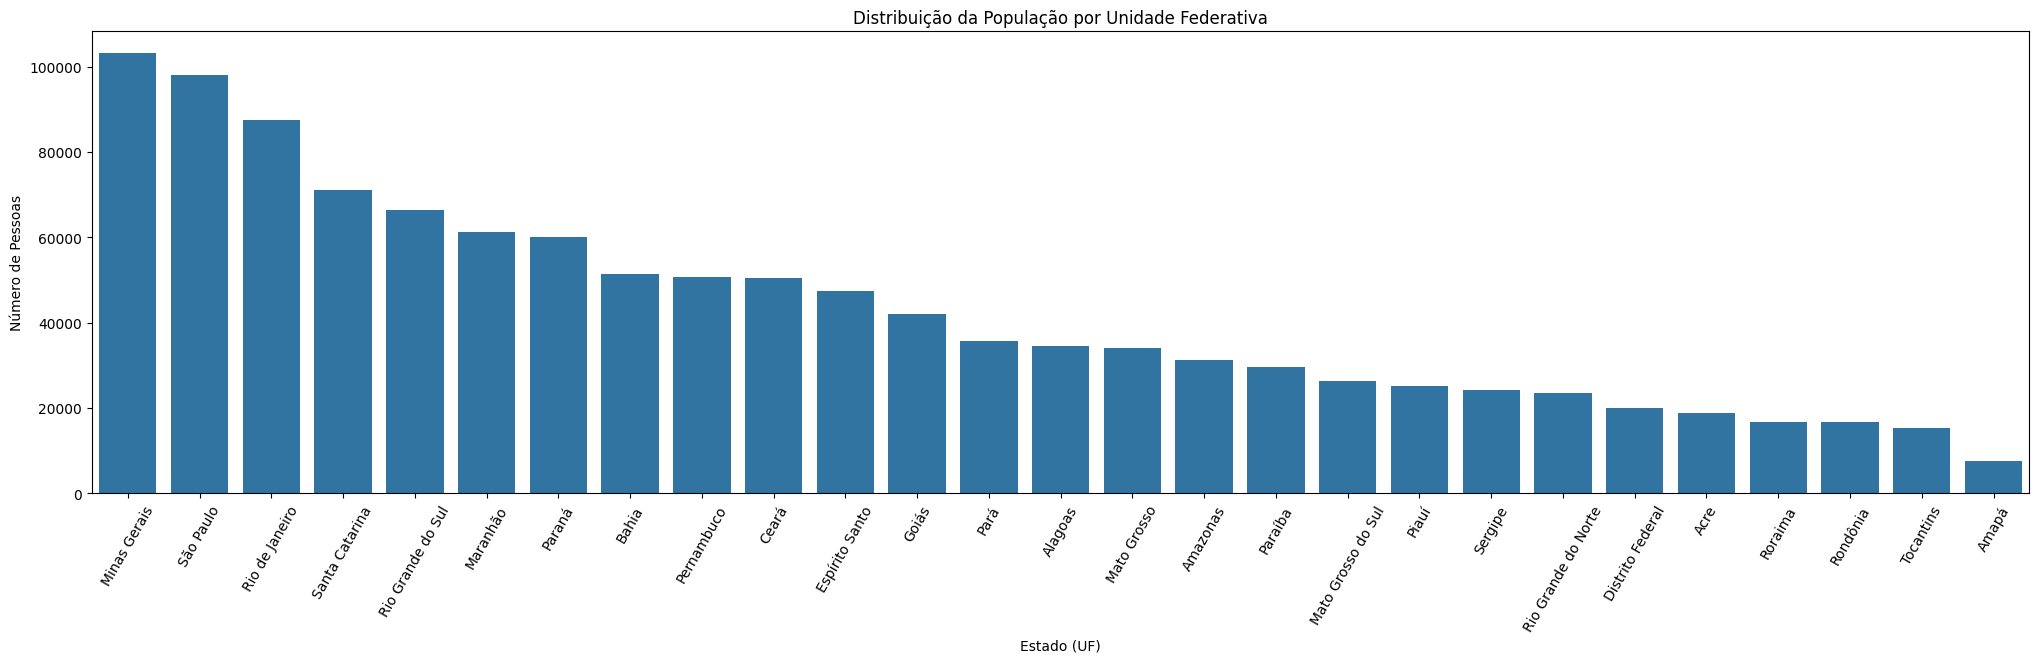

In [ ]:
# Gráfico de distribuição da população por UF
plt.figure(figsize=(25, 6))
sns.countplot(data=pnad_covid_curated_pd, x='uf',order = pnad_covid_curated_pd['uf'].value_counts().index)
#sns.countplot(data=pnad_covid_curated_pd, x='uf', order=sorted(pnad_covid_curated_pd['uf'].unique()))
plt.title('Distribuição da População por Unidade Federativa')
plt.xticks(rotation=60)
plt.ylabel('Número de Pessoas')
plt.xlabel('Estado (UF)')
plt.show()

In [ ]:
# Registrar DataFrame como uma tabela temporária
pnad_covid_curated.createOrReplaceTempView("pnad_covid")

# Consulta SQL para distribuição da população por sexo e raça em percentual
query = """
SELECT
    cor_raca,
     sexo,
    COUNT(*) AS count,
    ROUND((COUNT(*) * 100.0 / (SELECT COUNT(*) FROM pnad_covid)),2) AS percentual
FROM
    pnad_covid
GROUP BY
    sexo,cor_raca
ORDER BY
    percentual DESC
"""

# Executar a consulta
sexo_raca_distribution = spark.sql(query)

# Converter o resultado PySpark para Pandas
sexo_raca_distribution_pd  = sexo_raca_distribution.toPandas()

# Exibir a tabela usando display
from IPython.display import display
display(sexo_raca_distribution_pd)

,cor_raca,sexo,count,percentual
0,Parda,Feminino,290017,25.24
1,Parda,Masculino,273287,23.78
2,Branca,Feminino,254785,22.17
3,Branca,Masculino,225170,19.59
4,Preta,Feminino,47532,4.14
5,Preta,Masculino,46914,4.08
6,Amarela,Feminino,3649,0.32
7,Amarela,Masculino,3089,0.27
8,Indígena,Feminino,2400,0.21
9,Indígena,Masculino,2080,0.18


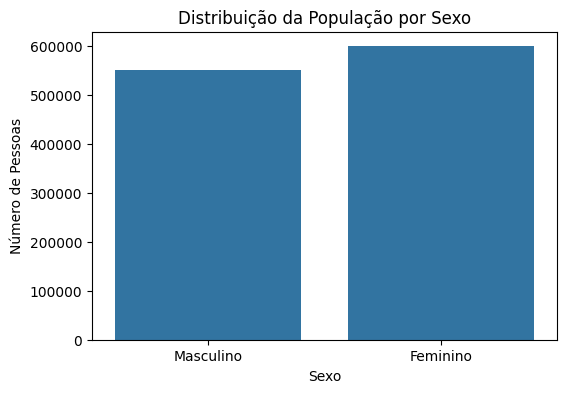

In [ ]:
# Gráfico de distribuição por sexo
plt.figure(figsize=(6, 4))
sns.countplot(data=pnad_covid_curated_pd, x='sexo')
plt.title('Distribuição da População por Sexo')
plt.ylabel('Número de Pessoas')
plt.xlabel('Sexo')
plt.show()

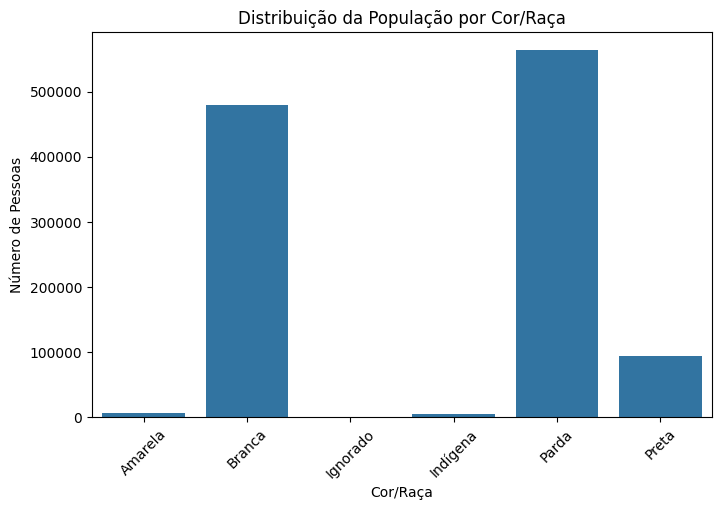

In [ ]:
# Gráfico de distribuição por cor/raça
plt.figure(figsize=(8, 5))
sns.countplot(data=pnad_covid_curated_pd, x='cor_raca', order=sorted(pnad_covid_curated_pd['cor_raca'].unique()))
plt.title('Distribuição da População por Cor/Raça')
plt.ylabel('Número de Pessoas')
plt.xlabel('Cor/Raça')
plt.xticks(rotation=45)
plt.show()

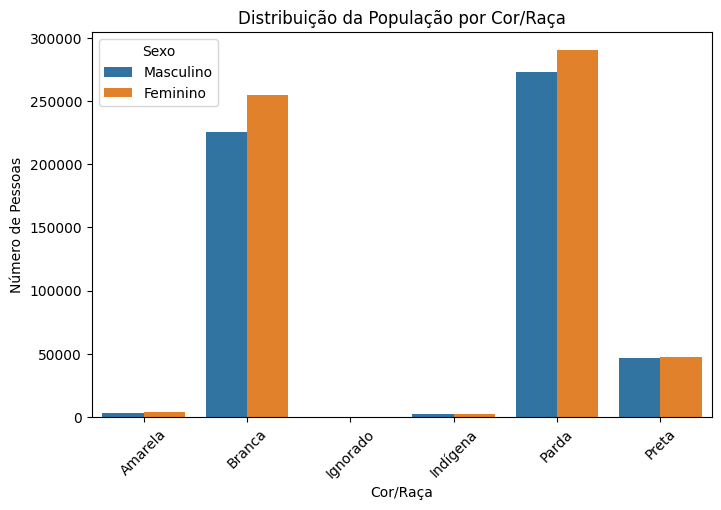

In [ ]:
# Gráfico de distribuição por cor/raça e sexo
plt.figure(figsize=(8, 5))
sns.countplot(data=pnad_covid_curated_pd, x='cor_raca',hue='sexo',order=sorted(pnad_covid_curated_pd['cor_raca'].unique()))
plt.title('Distribuição da População por Cor/Raça')
plt.ylabel('Número de Pessoas')
plt.xlabel('Cor/Raça')
plt.xticks(rotation=45)
plt.legend(title='Sexo')
plt.show()

In [ ]:
# Registrar DataFrame como uma tabela temporária
pnad_covid_curated.createOrReplaceTempView("pnad_covid")

# Consulta SQL para distribuição da população por estados e área domicílio em percentual
query = """
SELECT
    uf,
    area_domicilio,
    COUNT(*) AS count,
    ROUND((COUNT(*) * 100.0 / (SELECT COUNT(*) FROM pnad_covid)),2) AS percentual
FROM
    pnad_covid
GROUP BY
    uf, area_domicilio
ORDER BY
    percentual DESC
"""

# Executar a consulta
area_distribution = spark.sql(query)

# Converter o resultado PySpark para Pandas
area_distribution_pd  = area_distribution.toPandas()

# Exibir a tabela usando display
from IPython.display import display
display(area_distribution_pd)

,uf,area_domicilio,count,percentual
0,Rio de Janeiro,Urbana,81912,7.13
1,São Paulo,Urbana,80956,7.04
2,Minas Gerais,Urbana,76102,6.62
3,Santa Catarina,Urbana,56342,4.90
4,Rio Grande do Sul,Urbana,49633,4.32
5,Paraná,Urbana,48237,4.20
6,Espírito Santo,Urbana,39219,3.41
7,Pernambuco,Urbana,36992,3.22
8,Goiás,Urbana,35565,3.09
9,Maranhão,Urbana,34325,2.99


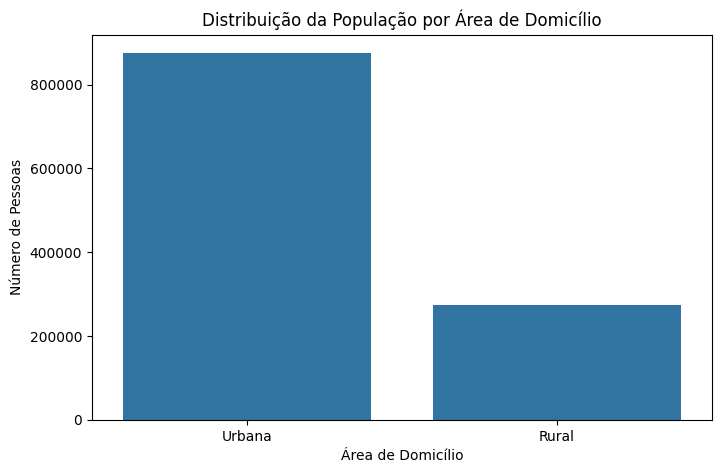

In [ ]:
# Gráfico de distribuição por área de domicílio (Urbana/Rural)
plt.figure(figsize=(8, 5))
sns.countplot(data=pnad_covid_curated_pd, x='area_domicilio')
plt.title('Distribuição da População por Área de Domicílio')
plt.ylabel('Número de Pessoas')
plt.xlabel('Área de Domicílio')
plt.show()

In [ ]:
# Registrar DataFrame como uma tabela temporária
pnad_covid_curated.createOrReplaceTempView("pnad_covid")

# Consulta SQL para distribuição da população por estados em percentual
query = """
SELECT
    Sexo,
    cor_raca,
    area_domicilio,
    COUNT(*) AS count,
    ROUND((COUNT(*) * 100.0 / (SELECT COUNT(*) FROM pnad_covid)),2) AS percentual
FROM
    pnad_covid
GROUP BY
    sexo, area_domicilio, cor_raca
ORDER BY
    percentual DESC
"""

# Executar a consulta
sca_distribution = spark.sql(query)

# Converter o resultado PySpark para Pandas
sca_distribution_pd  = sca_distribution.toPandas()

# Exibir a tabela usando display
from IPython.display import display
display(sca_distribution_pd)

,Sexo,cor_raca,area_domicilio,count,percentual
0,Feminino,Parda,Urbana,215244,18.73
1,Feminino,Branca,Urbana,205973,17.92
2,Masculino,Parda,Urbana,195470,17.01
3,Masculino,Branca,Urbana,175020,15.23
4,Masculino,Parda,Rural,77817,6.77
5,Feminino,Parda,Rural,74773,6.51
6,Masculino,Branca,Rural,50150,4.36
7,Feminino,Branca,Rural,48812,4.25
8,Feminino,Preta,Urbana,38065,3.31
9,Masculino,Preta,Urbana,36462,3.17


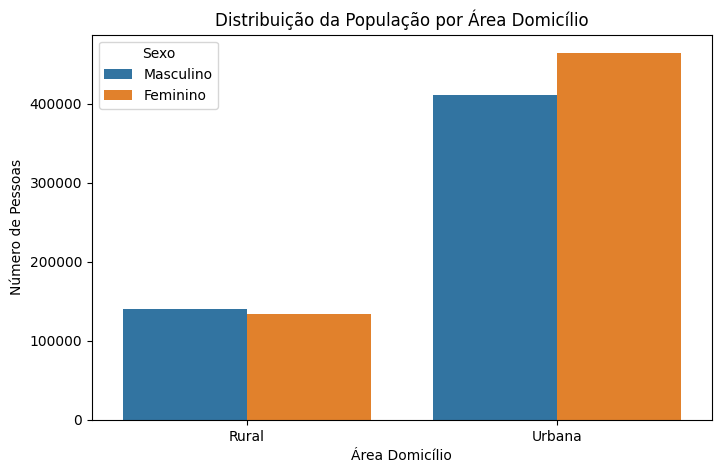

In [ ]:
# Gráfico de distribuição por área domicílio
plt.figure(figsize=(8, 5))
sns.countplot(data=pnad_covid_curated_pd, x='area_domicilio',hue='sexo',order=sorted(pnad_covid_curated_pd['area_domicilio'].unique()))
plt.title('Distribuição da População por Área Domicílio')
plt.ylabel('Número de Pessoas')
plt.xlabel('Área Domicílio')
plt.xticks(rotation=0)
plt.legend(title='Sexo')
plt.show()

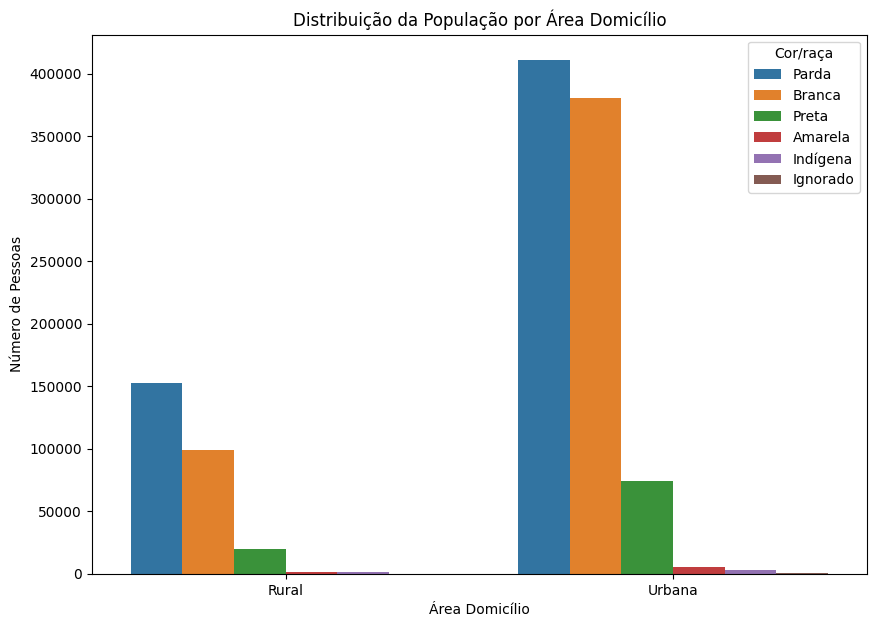

In [ ]:
# Gráfico de distribuição por área domicílio
plt.figure(figsize=(10, 7))
sns.countplot(data=pnad_covid_curated_pd, x='area_domicilio',hue='cor_raca',order=sorted(pnad_covid_curated_pd['area_domicilio'].unique()))
plt.title('Distribuição da População por Área Domicílio')
plt.ylabel('Número de Pessoas')
plt.xlabel('Área Domicílio')
plt.xticks(rotation=0)
plt.legend(title='Cor/raça')
plt.show()

In [ ]:
# Registrar DataFrame como uma tabela temporária
pnad_covid_curated.createOrReplaceTempView("pnad_covid")

# Consulta SQL para distribuição da população por faixa etária em percentual
query = """
SELECT
    Faixa_etaria,
    COUNT(*) AS count,
    ROUND((COUNT(*) * 100.0 / (SELECT COUNT(*) FROM pnad_covid)), 2) AS percentual
FROM
    pnad_covid
GROUP BY
    Faixa_etaria
ORDER BY
    percentual DESC
"""

# Executar a consulta
fe_distribution = spark.sql(query)

# Converter o resultado PySpark para Pandas
fe_distribution_pd = fe_distribution.toPandas()

# Exibir a tabela usando display
from IPython.display import display
display(fe_distribution_pd)

,Faixa_etaria,count,percentual
0,10-19 anos,169782,14.77
1,30-39 anos,168787,14.69
2,40-49 anos,164350,14.30
3,20-29 anos,156811,13.65
4,50-59 anos,151259,13.16
5,0-9 anos,135872,11.82
6,60-69 anos,112291,9.77
7,70-79 anos,60819,5.29
8,80-89 anos,24155,2.10
9,90-99 anos,4790,0.42


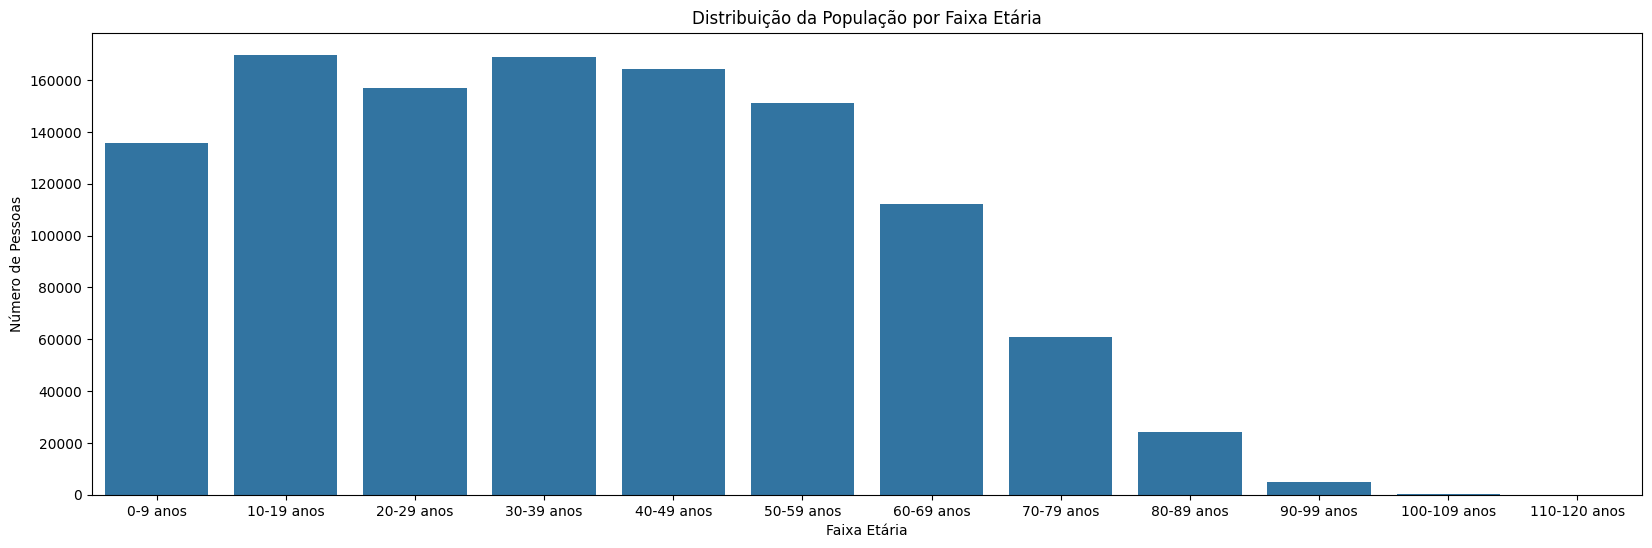

In [ ]:
# Função para ordenar faixas etárias baseado no primeiro número do intervalo
def sort_faixas(faixa):
    return int(faixa.split('-')[0])

# Ordenar as faixas etárias com base no primeiro número
ordered_faixas = sorted(pnad_covid_curated_pd['faixa_etaria'].unique(), key=sort_faixas)

# Plot do gráfico de distribuição por faixa etária
plt.figure(figsize=(20, 6))
sns.countplot(data=pnad_covid_curated_pd, x='faixa_etaria', order=ordered_faixas)
plt.title('Distribuição da População por Faixa Etária')
plt.ylabel('Número de Pessoas')
plt.xlabel('Faixa Etária')
plt.xticks(rotation=0)
plt.show()

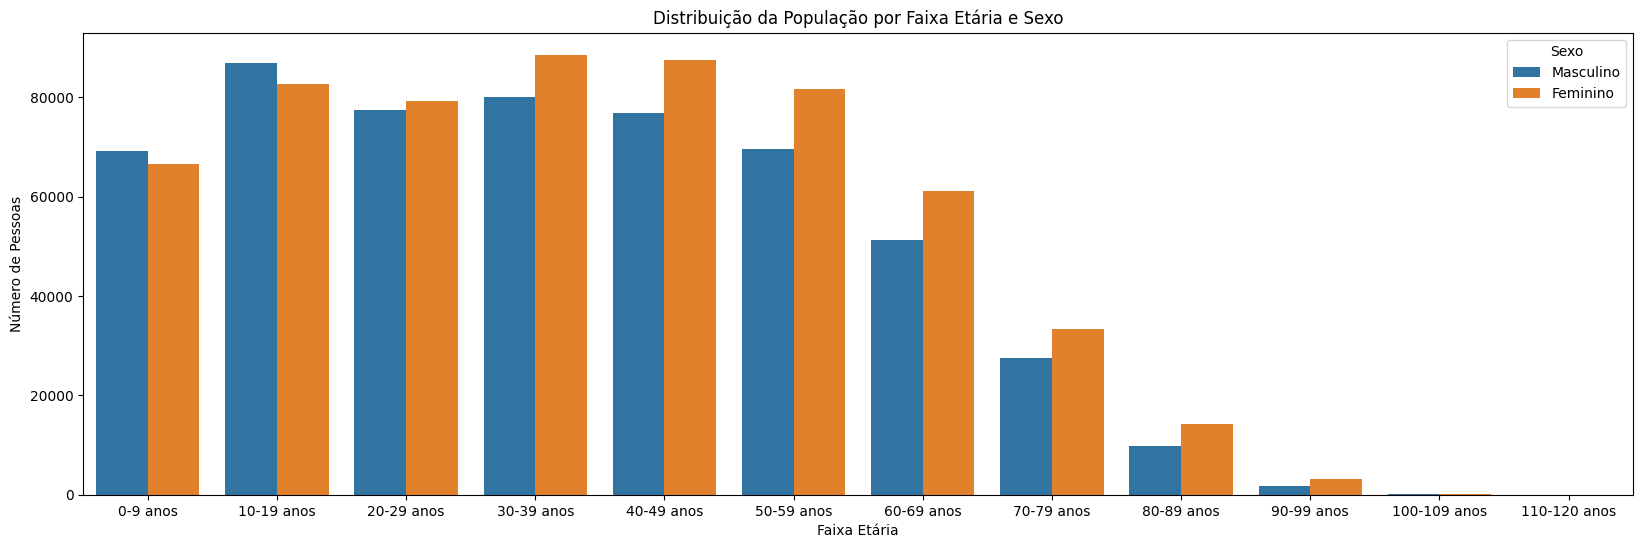

In [ ]:
# Função para ordenar faixas etárias baseado no primeiro número do intervalo
def sort_faixas(faixa):
    # Tratamento para lidar com faixas etárias não padrão, como "60 ou mais"
    if 'ou mais' in faixa:
        return int(faixa.split()[0])  # Pegamos o primeiro número
    return int(faixa.split('-')[0])  # Pegamos o primeiro número do intervalo

# Ordenar as faixas etárias com base no primeiro número
ordered_faixas = sorted(pnad_covid_curated_pd['faixa_etaria'].unique(), key=sort_faixas)

# Plot do gráfico de distribuição por faixa etária
plt.figure(figsize=(20, 6))
sns.countplot(data=pnad_covid_curated_pd,
              x='faixa_etaria',
              hue='sexo',
              order=ordered_faixas)  # Usar a lista ordenada corretamente

plt.title('Distribuição da População por Faixa Etária e Sexo')
plt.ylabel('Número de Pessoas')
plt.xlabel('Faixa Etária')

# Rotacionar os ticks do eixo x
plt.xticks(rotation=0)

# Adicionar legenda
plt.legend(title='Sexo')

# Mostrar o gráfico
plt.show()

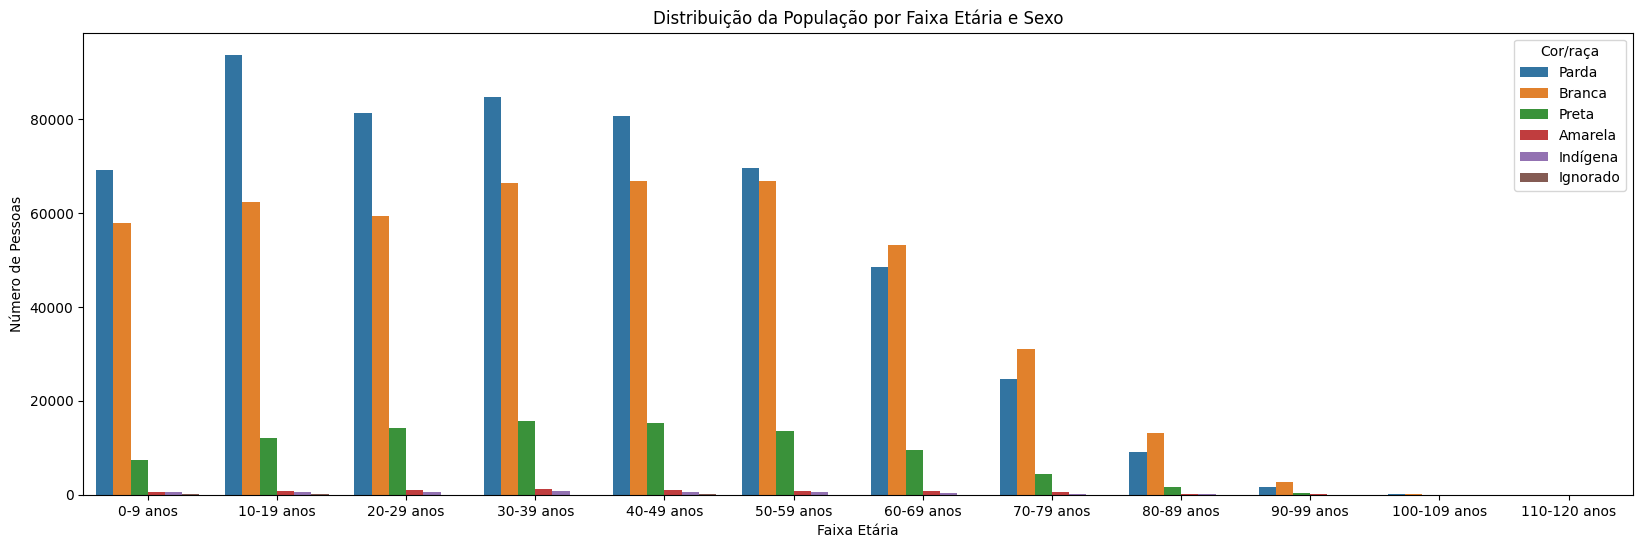

In [ ]:
# Função para ordenar faixas etárias baseado no primeiro número do intervalo
def sort_faixas(faixa):
    # Tratamento para lidar com faixas etárias não padrão, como "60 ou mais"
    if 'ou mais' in faixa:
        return int(faixa.split()[0])  # Pegamos o primeiro número
    return int(faixa.split('-')[0])  # Pegamos o primeiro número do intervalo
# Ordenar as faixas etárias com base no primeiro número
ordered_faixas = sorted(pnad_covid_curated_pd['faixa_etaria'].unique(), key=sort_faixas)
# Plot do gráfico de distribuição por faixa etária
plt.figure(figsize=(20, 6))
sns.countplot(data=pnad_covid_curated_pd, x='faixa_etaria',hue='cor_raca',order=ordered_faixas)
plt.title('Distribuição da População por Faixa Etária e Sexo')
plt.ylabel('Número de Pessoas')
plt.xlabel('Faixa Etária')
plt.xticks(rotation=0)
plt.legend(title='Cor/raça')
plt.show()

In [ ]:
# Registrar DataFrame como uma tabela temporária
pnad_covid_curated.createOrReplaceTempView("pnad_covid")

# Consulta SQL para distribuição da população por escolaridade em percentual
query = """
SELECT
    escolaridade,
    COUNT(*) AS count,
    ROUND((COUNT(*) * 100.0 / (SELECT COUNT(*) FROM pnad_covid)), 2) AS percentual
FROM
    pnad_covid
GROUP BY
    escolaridade
ORDER BY
    percentual DESC
"""

# Executar a consulta
escolaridade_distribution = spark.sql(query)

# Converter o resultado PySpark para Pandas
escolaridade_distribution_pd = escolaridade_distribution.toPandas()

# Exibir a tabela usando display
from IPython.display import display
display(escolaridade_distribution_pd)

,escolaridade,count,percentual
0,Fundamental incompleto,387986,33.76
1,Médio completo,256040,22.28
2,Sem instrução,124035,10.79
3,Médio incompleto,107635,9.37
4,Superior completo,107441,9.35
5,Fundamental completa,76092,6.62
6,Superior incompleto,59678,5.19
7,"Pós-graduação, mestrado ou doutorado",30290,2.64


In [ ]:
# Registrar DataFrame como uma tabela temporária
pnad_covid_curated.createOrReplaceTempView("pnad_covid")

# Consulta SQL para distribuição da população por cor/raça e sexo
query = """
SELECT
    cor_raca,
    sexo,
    escolaridade,
    COUNT(*) AS count,
    ROUND((COUNT(*) * 100.0 / (SELECT COUNT(*) FROM pnad_covid)), 2) AS percentual
FROM
    pnad_covid
GROUP BY
    1,2,3
ORDER BY
    percentual DESC
"""

# Executar a consulta
cse_distribution = spark.sql(query)

# Converter o resultado PySpark para Pandas
cse_distribution_pd = cse_distribution.toPandas()

# Exibir a tabela usando display
from IPython.display import display
display(cse_distribution_pd)

,cor_raca,sexo,escolaridade,count,percentual
0,Parda,Masculino,Fundamental incompleto,106272,9.25
1,Parda,Feminino,Fundamental incompleto,101671,8.85
2,Branca,Feminino,Fundamental incompleto,73452,6.39
3,Branca,Masculino,Fundamental incompleto,72009,6.27
4,Parda,Feminino,Médio completo,67830,5.90
...,...,...,...,...,...
91,Indígena,Feminino,"Pós-graduação, mestrado ou doutorado",45,0.00
92,Ignorado,Masculino,Superior incompleto,3,0.00
93,Ignorado,Feminino,"Pós-graduação, mestrado ou doutorado",8,0.00
94,Ignorado,Masculino,Médio incompleto,9,0.00


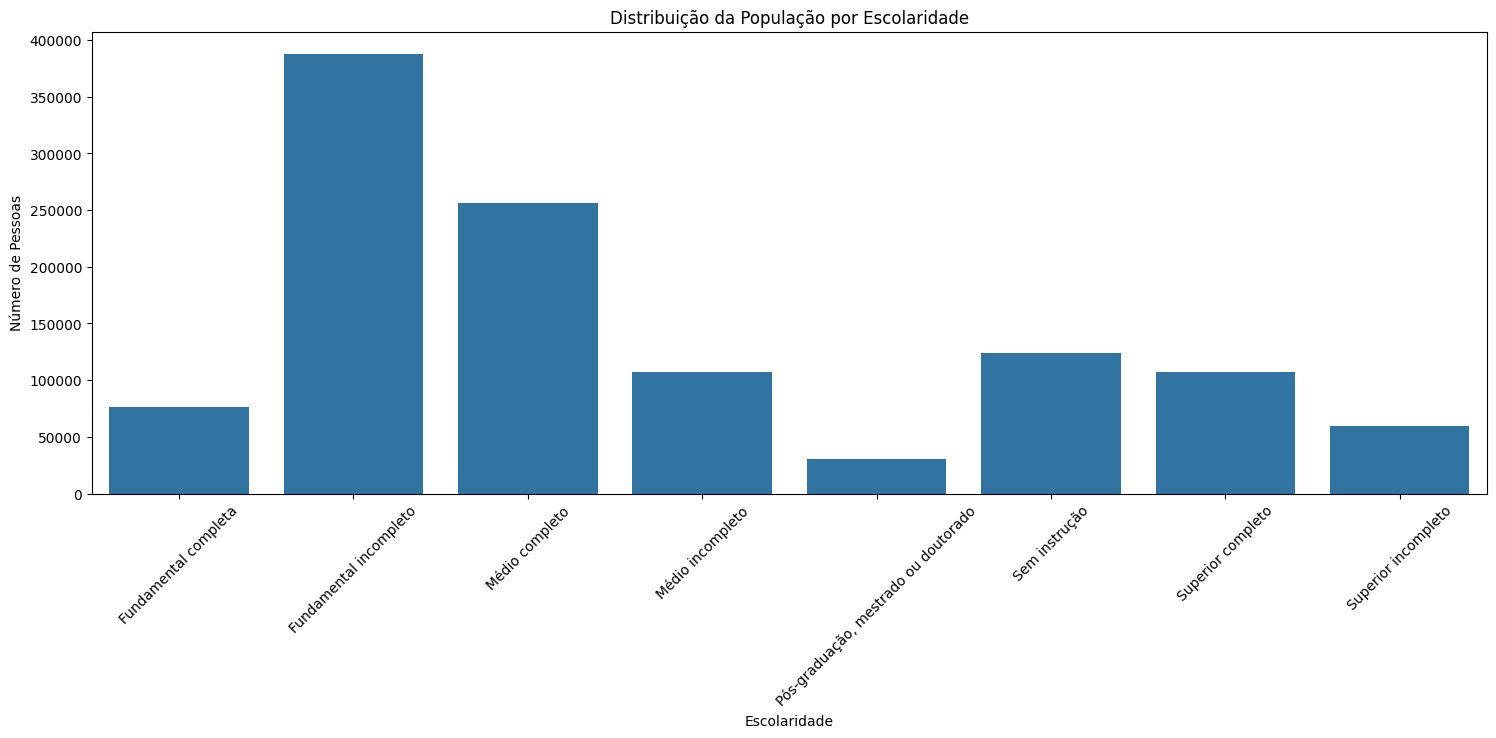

In [ ]:
# Gráfico de distribuição por escolaridade
plt.figure(figsize=(18, 6))
sns.countplot(data=pnad_covid_curated_pd, x='escolaridade', order=sorted(pnad_covid_curated_pd['escolaridade'].unique()))
plt.title('Distribuição da População por Escolaridade')
plt.ylabel('Número de Pessoas')
plt.xlabel('Escolaridade')
plt.xticks(rotation=45)
plt.show()

#6. Análise dos sintomas clínicos da população
Este tópico tem como objetivo realizar uma análise detalhada dos sintomas clínicos da população, considerando indicadores sociodemográficos, com foco no período de três meses: setembro, outubro e novembro de 2020. A análise abrangerá os seguintes aspectos:

- **Teve Febre, Teve Tosse, Teve Dificuldade de Respirar, Perda de Cheiro/Sabor**: Identificação da presença desses sintomas clínicos na população.
- **Tem Plano de Saúde**: Verificação do percentual da população que possui acesso a serviços privados de saúde.
- **Teste COVID**: Análise da realização de testes para COVID-19 entre os diferentes grupos.
- **Hipertensão, Doença Respiratória, Doença do Coração, Diagnóstico de Câncer**: Investigação de comorbidades prevalentes que podem influenciar a gravidade dos sintomas.
- **Contato Restrito**: Avaliação do nível de isolamento ou restrição de contato entre as pessoas.

A partir dessa análise, espera-se identificar correlações entre sintomas e condições preexistentes, além de gerar insights sobre a disseminação da COVID-19 e a vulnerabilidade da população com base em fatores sociodemográficos e clínicos.



##6.1. Teve Febre, Teve Tosse, Teve Dificuldade de Respirar, Perda de Cheiro/Sabor

In [ ]:
# Registrar DataFrame como uma tabela temporária
pnad_covid_curated.createOrReplaceTempView("pnad_covid")

# Consulta SQL para distribuição da população por sintomas
query = """
SELECT
    teve_febre,
    teve_tosse,
    teve_dificuldade_respirar,
    perda_cheiro_sabor,
    COUNT(*) AS count,
    ROUND((COUNT(*) * 100.0 / (SELECT COUNT(*) FROM pnad_covid)), 2) AS percentual,
    ROUND((COUNT(CASE WHEN teste_covid = 'Sim' THEN 1 END) * 100.0 /(SELECT COUNT(*) FROM pnad_covid)), 2) AS percentual_covid
FROM
    pnad_covid
GROUP BY
    1,2,3,4
ORDER BY
     percentual_covid DESC
"""

# Executar a consulta
tf_distribution = spark.sql(query)

# Converter o resultado PySpark para Pandas
tf_distribution_pd = tf_distribution.toPandas()

# Exibir a tabela usando display
from IPython.display import display
display(tf_distribution_pd)

,teve_febre,teve_tosse,teve_dificuldade_respirar,perda_cheiro_sabor,count,percentual,percentual_covid
0,Não,Não,Não,Não,1122203,97.65,10.94
1,Não,Sim,Não,Não,8574,0.75,0.15
2,Sim,Não,Não,Não,2925,0.25,0.08
3,Sim,Sim,Não,Não,2405,0.21,0.08
4,Sim,Sim,Sim,Sim,996,0.09,0.06
...,...,...,...,...,...,...,...
98,Ignorado,Sim,Sim,Ignorado,1,0.00,0.00
99,Não,Não foi atendido,Não,Sim,1,0.00,0.00
100,Sim,Ignorado,Não,Sim,1,0.00,0.00
101,Não sabe,Não,Não foi atendido,Não,2,0.00,0.00


- **Esses gráficos trazem uma visão em escala simplificada da distribuição de pessoas por síntomas**

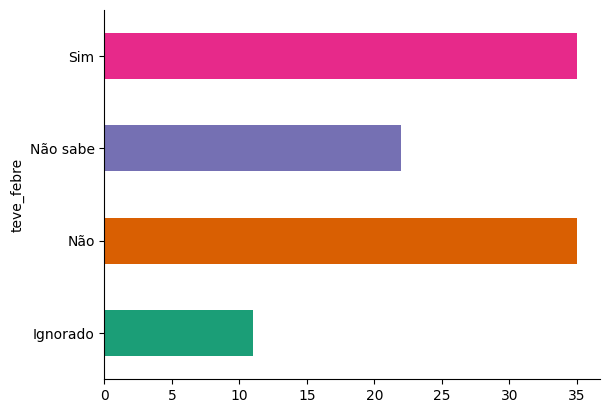

In [ ]:
tf_distribution_pd.groupby('teve_febre').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

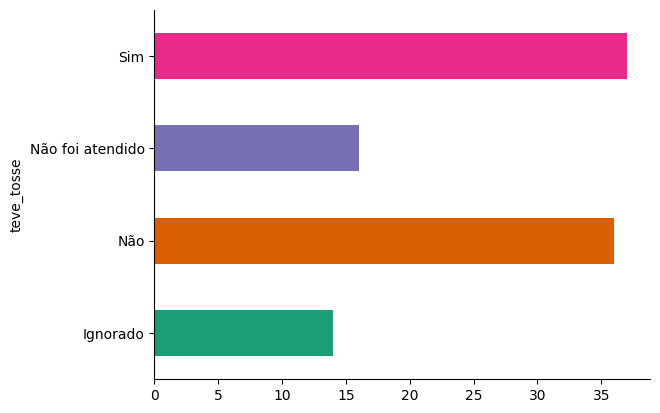

In [ ]:
tf_distribution_pd.groupby('teve_tosse').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

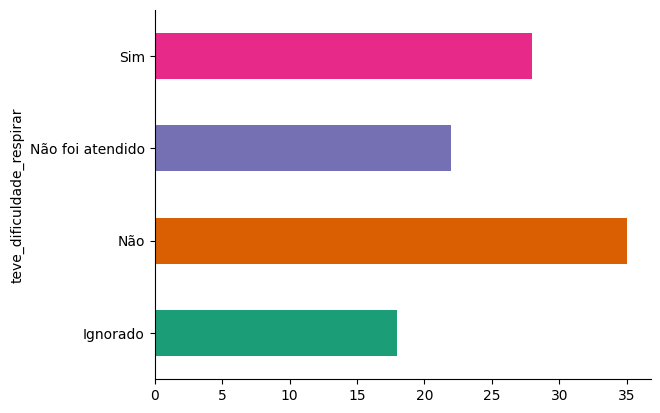

In [ ]:
tf_distribution_pd.groupby('teve_dificuldade_respirar').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

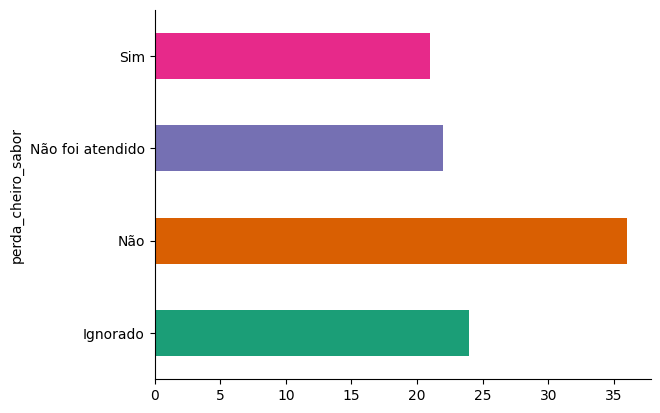

In [ ]:
tf_distribution_pd.groupby('perda_cheiro_sabor').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Registrar DataFrame como uma tabela temporária
pnad_covid_curated.createOrReplaceTempView("pnad_covid")

# Consulta SQL para distribuição da população por sintomas
query = """
SELECT
    teve_febre,
    teve_tosse,
    teve_dificuldade_respirar,
    perda_cheiro_sabor,
    COUNT(*) AS count,
    COUNT(CASE WHEN teste_covid = 'Sim' THEN 1 END) AS count_covid,
    ROUND((COUNT(*) * 100.0 / (SELECT COUNT(*) FROM pnad_covid)), 2) AS percentual,
    ROUND((COUNT(CASE WHEN teste_covid = 'Sim' THEN 1 END) * 100.0 / COUNT(*)), 2) AS percentual_covid
FROM
    pnad_covid
WHERE
    1=1
    AND teve_febre = 'Sim'
    AND teve_tosse = 'Sim'
    AND teve_dificuldade_respirar = 'Sim'
GROUP BY
    1,2,3,4
ORDER BY
    count_covid DESC
"""

# Executar a consulta
tf_distribution = spark.sql(query)

# Converter o resultado PySpark para Pandas
tf_distribution_pd = tf_distribution.toPandas()

# Exibir a tabela usando display
from IPython.display import display
display(tf_distribution_pd)

,teve_febre,teve_tosse,teve_dificuldade_respirar,perda_cheiro_sabor,count,count_covid,percentual,percentual_covid
0,Sim,Sim,Sim,Sim,996,660,0.09,66.27
1,Sim,Sim,Sim,Não,618,337,0.05,54.53
2,Sim,Sim,Sim,Ignorado,49,20,0.00,40.82
3,Sim,Sim,Sim,Não foi atendido,8,4,0.00,50.00


- **Quase 0,1 % das pessoas que participaram da pesquisa  tiveram febre,  tosse, dificuldade para respirar e perda de cheiro e sabor ao mesmo tempo.  66,27 % das pessoas com esses sintomas fizeram o teste da covid.**

- **Vale apontar também  que a maioria das pessoas que fizeram o teste da covid não apresentavam nenhuns sintomas de febre,tosse e perda de cheiro e sabor**


##6.2.Tem Plano de Saúde

In [ ]:
# Registrar DataFrame como uma tabela temporária
pnad_covid_curated.createOrReplaceTempView("pnad_covid")

# Consulta SQL para distribuição da população por sintomas
query = """
SELECT
    tem_plano_saude,
    ROUND((COUNT(*) * 100.0 / (SELECT COUNT(*) FROM pnad_covid)), 2) AS percentual
FROM
    pnad_covid
GROUP BY
    1
ORDER BY
    percentual DESC
"""

# Executar a consulta
ps_distribution = spark.sql(query)

# Converter o resultado PySpark para Pandas
ps_distribution_pd = ps_distribution.toPandas()

# Exibir a tabela usando display
from IPython.display import display
display(ps_distribution_pd)

,tem_plano_saude,percentual
0,Não,77.11
1,Sim,22.67
2,Ignorado,0.21


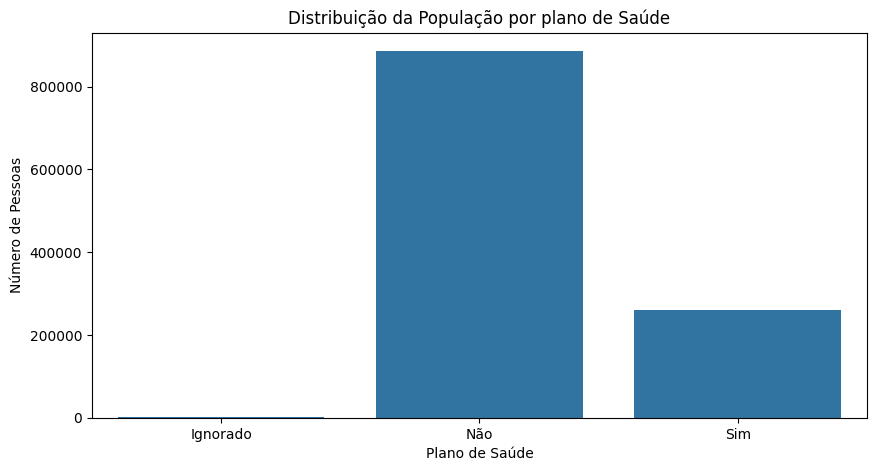

In [ ]:
# Gráfico da distribuição da população por plano de saúde
plt.figure(figsize=(10, 5))
sns.countplot(data=pnad_covid_curated_pd, x='tem_plano_saude', order=sorted(pnad_covid_curated_pd['tem_plano_saude'].unique()))
plt.title('Distribuição da População por plano de Saúde')
plt.xticks(rotation=0)
plt.ylabel('Número de Pessoas')
plt.xlabel('Plano de Saúde')
plt.show()

- **22,67% das pessaos que particiraram da pesquisa tem plano de saude e 77,11%  não possuem.**

In [ ]:
# Registrar DataFrame como uma tabela temporária
pnad_covid_curated.createOrReplaceTempView("pnad_covid")

# Consulta SQL para distribuição da população por sintomas
query = """
SELECT
    tem_plano_saude,
    teve_febre,
    teve_tosse,
    teve_dificuldade_respirar,
    perda_cheiro_sabor,
    COUNT(*) AS count,
    COUNT(CASE WHEN teste_covid = 'Sim' AND tem_plano_saude = 'Sim' THEN 1 END) AS count_covid_planosaude,
    ROUND((COUNT(*) * 100.0 / (SELECT COUNT(*) FROM pnad_covid)), 2) AS percentual,
    ROUND((COUNT(CASE WHEN teste_covid = 'Sim' AND tem_plano_saude = 'Sim' THEN 1 END) * 100.0 / COUNT(*)), 2) AS percentual_covid
FROM
    pnad_covid
WHERE
    1=1
    AND teve_febre = 'Sim'
    AND teve_tosse = 'Sim'
    AND teve_dificuldade_respirar = 'Sim'
GROUP BY
    1,2,3,4,5
ORDER BY
    count_covid_planosaude DESC
"""

# Executar a consulta
tf_distribution = spark.sql(query)

# Converter o resultado PySpark para Pandas
tf_distribution_pd = tf_distribution.toPandas()

# Exibir a tabela usando display
from IPython.display import display
display(tf_distribution_pd)

,tem_plano_saude,teve_febre,teve_tosse,teve_dificuldade_respirar,perda_cheiro_sabor,count,count_covid_planosaude,percentual,percentual_covid
0,Sim,Sim,Sim,Sim,Sim,266,203,0.02,76.32
1,Sim,Sim,Sim,Sim,Não,161,117,0.01,72.67
2,Sim,Sim,Sim,Sim,Ignorado,6,3,0.00,50.00
3,Não,Sim,Sim,Sim,Não foi atendido,8,0,0.00,0.00
4,Não,Sim,Sim,Sim,Ignorado,43,0,0.00,0.00
5,Ignorado,Sim,Sim,Sim,Sim,4,0,0.00,0.00
6,Não,Sim,Sim,Sim,Sim,726,0,0.06,0.00
7,Não,Sim,Sim,Sim,Não,457,0,0.04,0.00


- **0,02% da população que fizeram o teste da covid e que tiveram febre, tosse, dificuldade para respirar e perda de cheiro e de sabor, possuem um plano de saúde**

##6.3. Teste COVID

In [ ]:
# Registrar DataFrame como uma tabela temporária
pnad_covid_curated.createOrReplaceTempView("pnad_covid")

# Consulta SQL para distribuição da população por teste_covid
query = """
SELECT
    mes,
    teste_covid,
    COUNT(*) AS count,
    ROUND((COUNT(*) * 100.0 / (SELECT COUNT(*) FROM pnad_covid)), 2) AS percentual
FROM
    pnad_covid
GROUP BY
    mes, teste_covid
ORDER BY
    mes, teste_covid
"""

# Executar a consulta
teste_covid_distribution = spark.sql(query)

# Converter o resultado PySpark para Pandas
teste_covid_distribution_pd = teste_covid_distribution.toPandas()

# Exibir a tabela usando display
from IPython.display import display
display(teste_covid_distribution_pd)

,mes,teste_covid,count,percentual
0,9,Ignorado,1126,0.10
1,9,Não,347040,30.20
2,9,Sim,39132,3.41
3,10,Ignorado,674,0.06
4,10,Não,335247,29.17
5,10,Sim,44540,3.88
6,11,Ignorado,613,0.05
7,11,Não,330955,28.80
8,11,Sim,49870,4.34


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

<Figure size 2500x800 with 0 Axes>

<Figure size 2000x800 with 0 Axes>

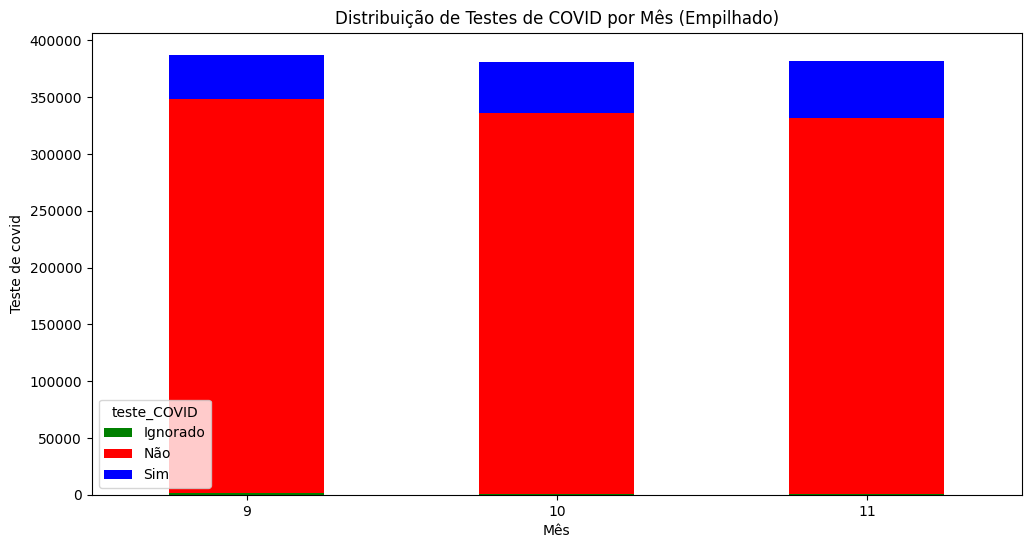

In [ ]:
# Configurando o tamanho da figura para o gráfico de contagem por mês
plt.figure(figsize=(25, 8))

#Gráfico de contagem por mês
#sns.countplot(data=pnad_covid_curated_pd, x='mes', order=sorted(pnad_covid_curated_pd['mes'].unique()))
#plt.title('Distribuição de Testes de COVID por Mês')  # Título
#plt.xlabel('mes')  # Corrigido para 'Mês'
#plt.ylabel('teste_covid')  # Descrição mais clara para o eixo y
#plt.xticks(rotation=0)
#plt.show()

# Criando uma tabela cruzada (crosstab) entre mês e resultado do teste de COVID
crosstab = pd.crosstab(pnad_covid_curated_pd['mes'], pnad_covid_curated_pd['teste_covid'])

# Gráfico empilhado para exibir a quantidade de testes por mês
plt.figure(figsize=(20, 8))  # Configurando o tamanho da figura
crosstab.plot(kind='bar', stacked=True, figsize=(12, 6), color=['green', 'red', 'blue', 'purple'])
plt.title('Distribuição de Testes de COVID por Mês (Empilhado)')  # Título
plt.xlabel('Mês')  # Rótulo do eixo x
plt.ylabel('Teste de covid')  # Rótulo do eixo y
plt.xticks(rotation=0)
plt.legend(title='teste_COVID')  # Legenda indicando o resultado do teste
plt.show()

-  **Com base nos dados, observamos que os últimos três meses apresentam uma amostra mais relevante em termos de registros com o valor de resultado_covid diferente de "NA". Dessa forma, decidimos utilizar os meses de novembro (11), outubro (10) e setembro (9) para a comparação.**

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o shapefile dos estados do Brasil
shapefile_path = '/content/sample_data/estados.zip'  # Ajuste conforme necessário
mapa = gpd.read_file(shapefile_path)

In [ ]:
print(mapa.columns)

Index(['NOME', 'NOMEABREV', 'GEOMETRIAA', 'SIGLA', 'GEOCODIGO', 'geometry'], dtype='object')


In [ ]:
print(mapa.head(5))

               NOME         NOMEABREV GEOMETRIAA SIGLA GEOCODIGO  \
0             Ceará             Ceará        Não    CE        23   
1  Distrito Federal  Distrito Federal        Não    DF        53   
2    Espírito Santo    Espírito Santo        Não    ES        32   
3             Amapá             Amapá        Não    AP        16   
4           Roraima           Roraima        Não    RR        14   

                                            geometry  
0  MULTIPOLYGON Z (((-40.20093 -2.81293 0, -40.20...  
1  MULTIPOLYGON Z (((-29.34586 0.91777 0, -29.345...  
2  MULTIPOLYGON Z (((-40.28188 -20.30203 0, -40.2...  
3  MULTIPOLYGON Z (((-50.50034 2.09786 0, -50.501...  
4  POLYGON Z ((-63.37846 2.22966 0, -63.37118 2.2...  


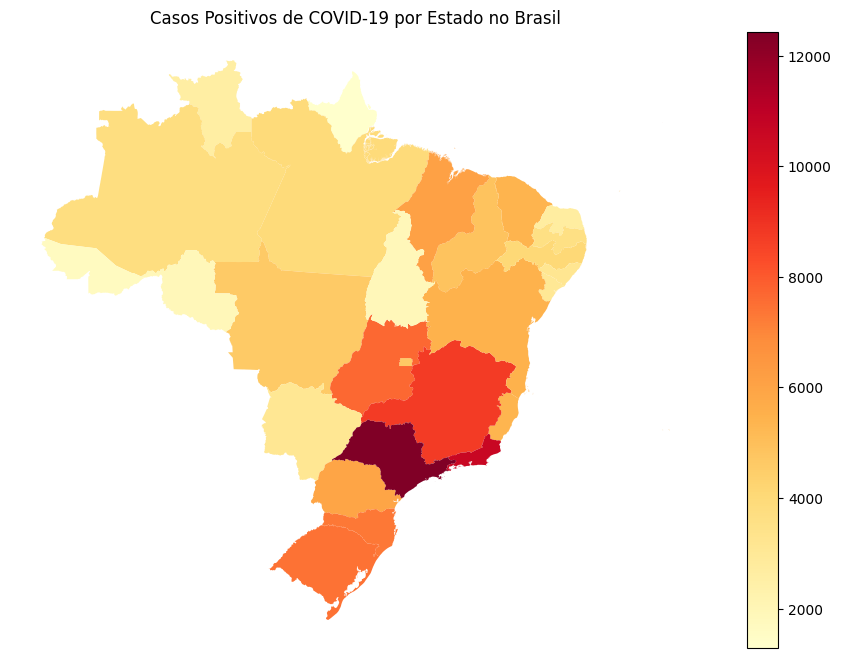

In [ ]:
# Filtrar o DataFrame original para casos positivos (teste_covid igual a 'Sim')
df_casos_positivos = pnad_covid_curated_pd[pnad_covid_curated_pd['teste_covid'] == 'Sim']

# Agregar e contar casos positivos por estado
casos_positivos_por_estado = df_casos_positivos['uf'].value_counts().reset_index()
casos_positivos_por_estado.columns = ['uf', 'teste_covid']

# Juntar o DataFrame `casos_positivos_por_estado` com o GeoDataFrame `mapa` usando a sigla dos estados
mapa = mapa.merge(casos_positivos_por_estado, left_on='NOME', right_on='uf', how='left')

# Plote o mapa com os casos positivos
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
mapa.plot(column='teste_covid', cmap='YlOrRd', ax=ax, legend=True, missing_kwds={'color': 'lightgrey'})  # Estados sem dados ficarão cinza
ax.set_title('Casos Positivos de COVID-19 por Estado no Brasil')
plt.axis('off')

# Mostrar o mapa
plt.show()


- **Os estados com testes de covid mais registrados foram Minas Gerais, São Paulo, Rio de janeiro, Santa catarina, Rio Grande do Sul e Maranhão**

In [ ]:
# Registrar DataFrame como uma tabela temporária
pnad_covid_curated.createOrReplaceTempView("pnad_covid")

# Consulta SQL para distribuição da população por teste_Covid
query = """
SELECT
    uf,
    COUNT(*) AS count,
    COUNT(CASE WHEN teste_covid = 'Sim' THEN 1 END) AS count_covid,
    ROUND((COUNT(*) * 100.0 / (SELECT COUNT(*) FROM pnad_covid)), 2) AS percentual,
    ROUND((COUNT(CASE WHEN teste_covid = 'Sim' THEN 1 END) * 100.0 / COUNT(*)), 2) AS percentual_covid
FROM
    pnad_covid
GROUP BY
    1
ORDER BY
    percentual_covid DESC
"""

# Executar a consulta
uftc_distribution = spark.sql(query)

# Converter o resultado PySpark para Pandas
uftc_distribution_pd = uftc_distribution.toPandas()

# Exibir a tabela usando display
from IPython.display import display
display(uftc_distribution_pd)

,uf,count,count_covid,percentual,percentual_covid
0,Distrito Federal,19906,4660,1.73,23.41
1,Piauí,25137,4891,2.19,19.46
2,Goiás,41977,7647,3.65,18.22
3,Amapá,7677,1289,0.67,16.79
4,Roraima,16674,2626,1.45,15.75
5,Mato Grosso,34156,4609,2.97,13.49
6,São Paulo,98021,12428,8.53,12.68
7,Sergipe,24216,3052,2.11,12.60
8,Tocantins,15446,1941,1.34,12.57
9,Paraíba,29687,3605,2.58,12.14


- **Apesar de serem os top 6 estados (Minas Gerais, São Paulo, Rio de Janeiro, Santa Catarina, Rio Grande do Sul e Maranhão) com mais testes de COVID registrados, não são os que possuem o maior percentual de pessoas que se voluntariam para fazer o teste.Os estados que se destaram neste quesito  foram o Distrito Federal, Piauí , Goiás, Amapa e Roraima.**

##6.4. Hipertensão, Doença Respiratória, Doença do Coração, Diagnóstico de Câncer

In [ ]:
# Registrar DataFrame como uma tabela temporária
pnad_covid_curated.createOrReplaceTempView("pnad_covid")

# Consulta SQL para distribuição da população por teste_Covid
query = """
SELECT
    hipertensao,
    COUNT(*) AS count,
    ROUND((COUNT(*) * 100.0 / (SELECT COUNT(*) FROM pnad_covid)), 2) AS percentual,
    ROUND((COUNT(CASE WHEN teste_covid = 'Sim' THEN 1 END) * 100.0 / COUNT(*)), 2) AS percentual_covid,
    ROUND((COUNT(CASE WHEN tem_plano_saude = 'Sim' THEN 1 END) * 100.0 / COUNT(*)), 2) AS percentual_plano_saude
FROM

    pnad_covid
GROUP BY
    1
ORDER BY
    percentual DESC
"""
# Executar a consulta
hdd_distribution = spark.sql(query)

# Converter o resultado PySpark para Pandas
hdd_distribution_pd = hdd_distribution.toPandas()

# Exibir a tabela usando display
from IPython.display import display
display(hdd_distribution_pd)

,hipertensao,count,percentual,percentual_covid,percentual_plano_saude
0,Não,971207,84.51,11.28,22.30
1,Sim,174546,15.19,13.64,25.06
2,Ignorado,3444,0.30,4.07,6.33


In [ ]:
# Registrar DataFrame como uma tabela temporária
pnad_covid_curated.createOrReplaceTempView("pnad_covid")

# Consulta SQL para distribuição da população por teste_Covid
query = """
SELECT
    doenca_respiratoria,
    COUNT(*) AS count,
    ROUND((COUNT(*) * 100.0 / (SELECT COUNT(*) FROM pnad_covid)), 2) AS percentual,
    ROUND((COUNT(CASE WHEN teste_covid = 'Sim' THEN 1 END) * 100.0 / COUNT(*)), 2) AS percentual_covid,
    ROUND((COUNT(CASE WHEN tem_plano_saude = 'Sim' THEN 1 END) * 100.0 / COUNT(*)), 2) AS percentual_plano_saude
FROM

    pnad_covid
GROUP BY
    1
ORDER BY
    percentual DESC
"""
# Executar a consulta
hdd_distribution = spark.sql(query)

# Converter o resultado PySpark para Pandas
hdd_distribution_pd = hdd_distribution.toPandas()

# Exibir a tabela usando display
from IPython.display import display
display(hdd_distribution_pd)

,doenca_respiratoria,count,percentual,percentual_covid,percentual_plano_saude
0,Não,1088412,94.71,11.42,22.32
1,Sim,57334,4.99,15.96,30.38
2,Ignorado,3451,0.30,3.94,6.40


In [ ]:
# Registrar DataFrame como uma tabela temporária
pnad_covid_curated.createOrReplaceTempView("pnad_covid")

# Consulta SQL para distribuição da população por teste_Covid
query = """
SELECT
    diagnostico_de_cancer,
    COUNT(*) AS count,
    ROUND((COUNT(*) * 100.0 / (SELECT COUNT(*) FROM pnad_covid)), 2) AS percentual,
    ROUND((COUNT(CASE WHEN teste_covid = 'Sim' THEN 1 END) * 100.0 / COUNT(*)), 2) AS percentual_covid,
    ROUND((COUNT(CASE WHEN tem_plano_saude = 'Sim' THEN 1 END) * 100.0 / COUNT(*)), 2) AS percentual_plano_saude
FROM

    pnad_covid
GROUP BY
    1
ORDER BY
    percentual DESC
"""
# Executar a consulta
hdd_distribution = spark.sql(query)

# Converter o resultado PySpark para Pandas
hdd_distribution_pd = hdd_distribution.toPandas()

# Exibir a tabela usando display
from IPython.display import display
display(hdd_distribution_pd)

,diagnostico_de_cancer,count,percentual,percentual_covid,percentual_plano_saude
0,Não,1133093,98.60,11.59,22.54
1,Sim,12541,1.09,16.43,39.29
2,Ignorado,3563,0.31,4.24,7.13


In [ ]:
# Registrar DataFrame como uma tabela temporária
pnad_covid_curated.createOrReplaceTempView("pnad_covid")

# Consulta SQL para distribuição da população por teste_Covid
query = """
SELECT
    doenca_do_coracao,
    COUNT(*) AS count,
    ROUND((COUNT(*) * 100.0 / (SELECT COUNT(*) FROM pnad_covid)), 2) AS percentual,
    ROUND((COUNT(CASE WHEN teste_covid = 'Sim' THEN 1 END) * 100.0 / COUNT(*)), 2) AS percentual_covid,
    ROUND((COUNT(CASE WHEN tem_plano_saude = 'Sim' THEN 1 END) * 100.0 / COUNT(*)), 2) AS percentual_plano_saude
FROM

    pnad_covid
GROUP BY
    1
ORDER BY
    percentual DESC
"""
# Executar a consulta
hdd_distribution = spark.sql(query)

# Converter o resultado PySpark para Pandas
hdd_distribution_pd = hdd_distribution.toPandas()

# Exibir a tabela usando display
from IPython.display import display
display(hdd_distribution_pd)

,doenca_do_coracao,count,percentual,percentual_covid,percentual_plano_saude
0,Não,1113189,96.87,11.54,22.52
1,Sim,32542,2.83,15.17,29.46
2,Ignorado,3466,0.30,3.92,6.41


##6.5. Contato Restrito

In [ ]:
# Registrar DataFrame como uma tabela temporária
pnad_covid_curated.createOrReplaceTempView("pnad_covid")

# Consulta SQL para distribuição da população por teste_Covid
query = """
SELECT
    contato_restrito,
    COUNT(*) AS count,
    ROUND((COUNT(*) * 100.0 / (SELECT COUNT(*) FROM pnad_covid)), 2) AS percentual,
    ROUND((COUNT(CASE WHEN teste_covid = 'Sim' THEN 1 END) * 100.0 / COUNT(*)), 2) AS percentual_covid,
    ROUND((COUNT(CASE WHEN tem_plano_saude = 'Sim' THEN 1 END) * 100.0 / COUNT(*)), 2) AS percentual_plano_saude
FROM

    pnad_covid
GROUP BY
    1
ORDER BY
    percentual DESC
"""
# Executar a consulta
hdd_distribution = spark.sql(query)

# Converter o resultado PySpark para Pandas
hdd_distribution_pd = hdd_distribution.toPandas()

# Exibir a tabela usando display
from IPython.display import display
display(hdd_distribution_pd)

,contato_restrito,count,percentual,percentual_covid,percentual_plano_saude
0,"Reduziu contato, mas saiu para trabalho ou ati...",484513,42.16,14.88,24.28
1,"Ficou em casa, saindo apenas para necessidades...",458950,39.94,9.17,21.40
2,Ficou rigorosamente em casa,154593,13.45,7.81,22.43
3,"Vida normal, sem restrições",46194,4.02,15.01,20.39
4,Ignorado,4947,0.43,6.59,11.81


In [ ]:
# Registrar DataFrame como uma tabela temporária
pnad_covid_curated.createOrReplaceTempView("pnad_covid")

# Consulta SQL para distribuição da população por sintomas
query = """
SELECT
    contato_restrito,
    tem_plano_saude,
    teve_febre,
    teve_tosse,
    teve_dificuldade_respirar,
    perda_cheiro_sabor,
    ROUND((COUNT(*) * 100.0 / (SELECT COUNT(*) FROM pnad_covid)), 2) AS percentual,
    ROUND((COUNT(CASE WHEN teste_covid = 'Sim' THEN 1 END) * 100.0 / COUNT(*)), 2) AS percentual_covid,
    ROUND((COUNT(CASE WHEN tem_plano_saude = 'Sim' THEN 1 END) * 100.0 /COUNT(*)), 2) AS percentual_plano_saude,
    ROUND(( COUNT(CASE WHEN teste_covid = 'Sim' AND tem_plano_saude = 'Sim' THEN 1 END) * 100.0 / COUNT(*)), 2) AS percentual_covid_planosaude
FROM
    pnad_covid
WHERE
GROUP BY
    1,2,3,4,5,6
ORDER BY
    percentual DESC
"""

# Executar a consulta
tf_distribution = spark.sql(query)

# Converter o resultado PySpark para Pandas
tf_distribution_pd = tf_distribution.toPandas()

# Exibir a tabela usando display
from IPython.display import display
display(tf_distribution_pd)

,contato_restrito,tem_plano_saude,teve_febre,teve_tosse,teve_dificuldade_respirar,perda_cheiro_sabor,percentual,percentual_covid,percentual_plano_saude,percentual_covid_planosaude
0,"Reduziu contato, mas saiu para trabalho ou ati...",Não,Não,Não,Não,Não,31.36,11.15,0.00,0.00
1,"Ficou em casa, saindo apenas para necessidades...",Não,Não,Não,Não,Não,30.72,7.26,0.00,0.00
2,Ficou rigorosamente em casa,Não,Não,Não,Não,Não,10.11,5.65,0.00,0.00
3,"Reduziu contato, mas saiu para trabalho ou ati...",Sim,Não,Não,Não,Não,10.05,25.28,100.00,25.28
4,"Ficou em casa, saindo apenas para necessidades...",Sim,Não,Não,Não,Não,8.36,14.32,100.00,14.32
...,...,...,...,...,...,...,...,...,...,...
413,"Reduziu contato, mas saiu para trabalho ou ati...",Sim,Não,Não foi atendido,Não,Sim,0.00,0.00,100.00,0.00
414,"Vida normal, sem restrições",Sim,Sim,Não,Sim,Não,0.00,0.00,100.00,0.00
415,"Vida normal, sem restrições",Sim,Não,Ignorado,Ignorado,Ignorado,0.00,0.00,100.00,0.00
416,"Reduziu contato, mas saiu para trabalho ou ati...",Sim,Não sabe,Não,Não,Ignorado,0.00,100.00,100.00,100.00


#7. Análises econômicas da Sociedade
Este tópico tem como objetivo realizar uma análise detalhada dos impactos econômicos na sociedade a partir de indicadores relacionados à renda e segurança financeira, com foco no período de três meses: setembro, outubro e novembro de 2020. A análise abrangerá os seguintes aspectos:

- **Auxílios Emergenciais**: Avaliação da distribuição e impacto dos auxílios emergenciais sobre a economia doméstica das famílias, especialmente as de baixa renda, e sua influência no consumo e manutenção das necessidades básicas.
- **Seguro-Desemprego**: Verificação do aumento no número de solicitações de seguro-desemprego e sua correlação com o nível de desemprego, setores mais afetados e a recuperação econômica durante o período.
- **Solicitação de Empréstimo**: Investigação do volume de pedidos de empréstimos por parte de pessoas físicas e pequenas empresas, avaliando a necessidade de crédito para manter operações ou cobrir despesas pessoais durante a crise.

A partir dessa análise, espera-se identificar tendências sobre a vulnerabilidade econômica das diferentes camadas da sociedade e gerar insights sobre a eficácia das políticas de apoio financeiro implementadas durante a pandemia.


In [ ]:
# Registrar DataFrame como uma tabela temporária
pnad_covid_curated.createOrReplaceTempView("pnad_covid")

# Consulta SQL para verificar quem precisou de dinheiro
query = """
SELECT
  case
     when auxilios_emergenciais = 'Sim'
     or seguro_desemprego = 'Sim'
     or solicitacao_emprestimo like 'Sim%'
     then 'Sim'
     else 'Nao'
  end as precisou_dinheiro,
  COUNT(*) AS count,
  ROUND((COUNT(*) * 100.0 / (SELECT COUNT(*) FROM pnad_covid)), 2) AS percentual
FROM
    pnad_covid
GROUP BY
  precisou_dinheiro
ORDER BY
  percentual DESC
"""

# Executar a consulta
dinheiro_distribution = spark.sql(query)

# Converter o resultado PySpark para Pandas
dinheiro_distribution_pd = dinheiro_distribution.toPandas()

# Exibir a tabela usando display
from IPython.display import display
display(dinheiro_distribution_pd)

,precisou_dinheiro,count,percentual
0,Sim,635717,55.32
1,Nao,513480,44.68


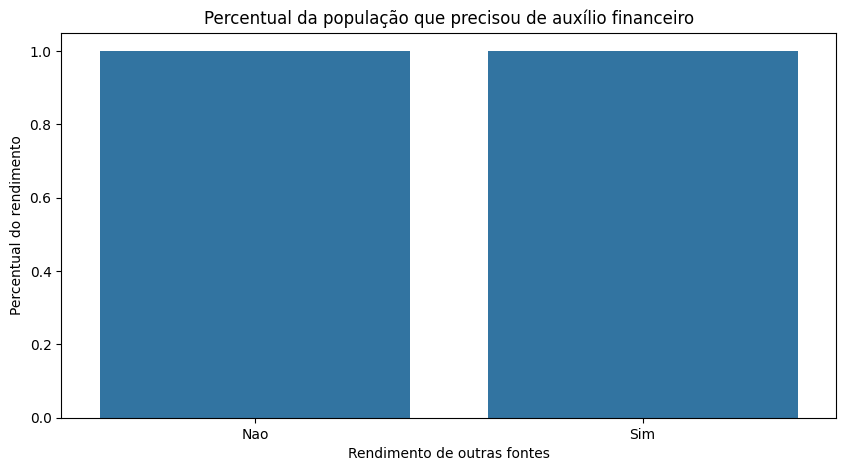

In [ ]:
# Gráfico da população que precisou de auxilio financeiro
plt.figure(figsize=(10, 5))
sns.countplot(data=dinheiro_distribution_pd, x='precisou_dinheiro', order=sorted(dinheiro_distribution_pd['precisou_dinheiro'].unique()))
plt.title('Percentual da população que precisou de auxílio financeiro')
plt.xticks(rotation=0)
plt.ylabel('Percentual do rendimento')
plt.xlabel('Rendimento de outras fontes')
plt.show()

* Observa-se que 55,32% da população entrevistada necessitou de auxílio, enquanto 44,08% não precisou

In [ ]:
#Registrar DataFrame como uma tabela temporária
pnad_covid_curated.createOrReplaceTempView("pnad_covid")

# Consulta SQL para verificar quem precisou de dinheiro
query = """
SELECT
  faixa_etaria,
  sexo,
  COUNT(*) AS count,
  ROUND((COUNT(*) * 100.0 / (SELECT COUNT(*) FROM pnad_covid)), 2) AS percentual,
  ROUND((COUNT(CASE WHEN auxilios_emergenciais = 'Sim' THEN 1 END) * 100.0 / COUNT(*)), 2) AS percentual_auxilios_emergenciais,
  ROUND((COUNT(CASE WHEN seguro_desemprego = 'Sim'THEN 1 END) * 100.0 / COUNT(*)), 2) AS percentual_auxilios_seguro_desemprego,
  ROUND((COUNT(CASE WHEN solicitacao_emprestimo like 'Sim%' THEN 1 END) * 100.0 / COUNT(*)), 2) AS percentual_solicitacao_emprestimo
FROM
    pnad_covid
GROUP BY
 faixa_etaria,sexo
ORDER BY
  faixa_etaria,sexo
"""

# Executar a consulta
concedido_distribution = spark.sql(query)

# Converter o resultado PySpark para Pandas
concedido_distribution_pd = concedido_distribution.toPandas()

# Exibir a tabela usando display
from IPython.display import display
display(concedido_distribution_pd)

,faixa_etaria,sexo,count,percentual,percentual_auxilios_emergenciais,percentual_auxilios_seguro_desemprego,percentual_solicitacao_emprestimo
0,0-9 anos,Feminino,66607,5.80,61.01,1.95,9.12
1,0-9 anos,Masculino,69265,6.03,60.54,1.89,9.13
2,10-19 anos,Feminino,82783,7.20,59.07,1.55,8.82
3,10-19 anos,Masculino,86999,7.57,58.22,1.52,9.04
4,100-109 anos,Feminino,176,0.02,31.25,0.00,5.68
5,100-109 anos,Masculino,90,0.01,20.00,0.00,7.78
6,110-120 anos,Feminino,12,0.00,50.00,0.00,0.00
7,110-120 anos,Masculino,3,0.00,100.00,0.00,0.00
8,20-29 anos,Feminino,79311,6.90,59.43,2.27,8.22
9,20-29 anos,Masculino,77500,6.74,57.45,2.26,8.53


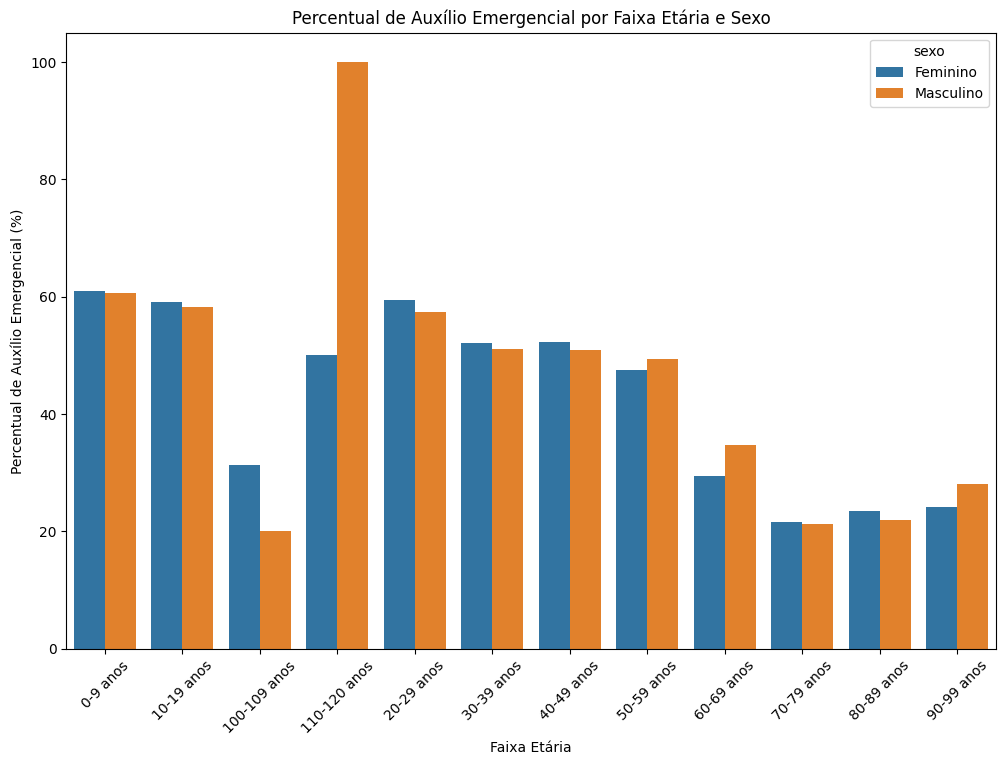

In [ ]:
# Gráfico por idade e sexo que precisaram do auxílio emergencial
plt.figure(figsize=(12, 8))
sns.barplot(data=concedido_distribution_pd, x='faixa_etaria', y='percentual_auxilios_emergenciais', hue='sexo')
plt.title('Percentual de Auxílio Emergencial por Faixa Etária e Sexo')
plt.xlabel('Faixa Etária')
plt.ylabel('Percentual de Auxílio Emergencial (%)')
plt.xticks(rotation=45)
plt.show()

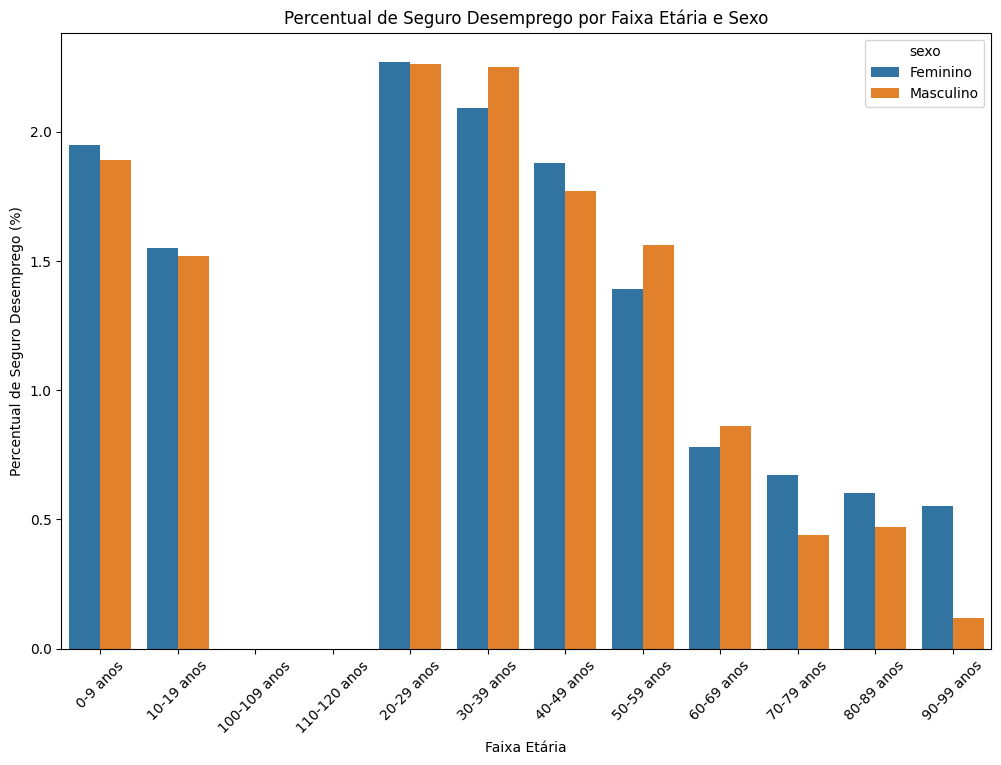

In [ ]:
# Gráfico por idade e sexo que precisaram do seguro desemprego
plt.figure(figsize=(12, 8))
sns.barplot(data=concedido_distribution_pd, x='faixa_etaria', y='percentual_auxilios_seguro_desemprego', hue='sexo')
plt.title('Percentual de Seguro Desemprego por Faixa Etária e Sexo')
plt.xlabel('Faixa Etária')
plt.ylabel('Percentual de Seguro Desemprego (%)')
plt.xticks(rotation=45)
plt.show()

* A análise do gráfico revela que as mulheres nas faixas etárias de 20 a 29 anos e de 30 a 39 anos constituem a maior parte dos beneficiários do seguro-desemprego.

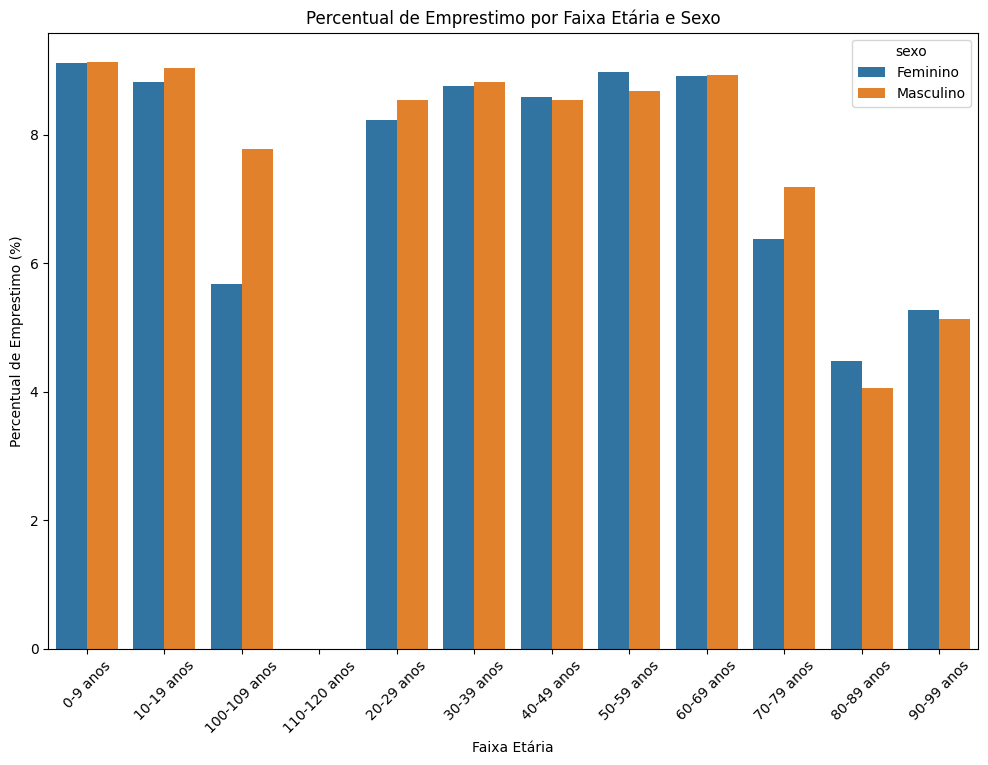

In [ ]:
# Gráfico por idade e sexo que precisaram de emprestimo
plt.figure(figsize=(12, 8))
sns.barplot(data=concedido_distribution_pd, x='faixa_etaria', y='percentual_solicitacao_emprestimo', hue='sexo')
plt.title('Percentual de Emprestimo por Faixa Etária e Sexo')
plt.xlabel('Faixa Etária')
plt.ylabel('Percentual de Emprestimo (%)')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Registrar DataFrame como uma tabela temporária
pnad_covid_curated.createOrReplaceTempView("pnad_covid")

# Consulta SQL para verificar quem precisou de dinheiro
query = """
SELECT
  faixa_etaria,
  COUNT(*) AS count,
  ROUND((COUNT(*) * 100.0 / (SELECT COUNT(*) FROM pnad_covid)), 2) AS percentual,
  ROUND((COUNT(CASE WHEN auxilios_emergenciais = 'Sim' THEN 1 END) * 100.0 / COUNT(*)), 2) AS percentual_auxilios_emergenciais,
  ROUND((COUNT(CASE WHEN seguro_desemprego = 'Sim'THEN 1 END) * 100.0 / COUNT(*)), 2) AS percentual_auxilios_seguro_desemprego,
  ROUND((COUNT(CASE WHEN solicitacao_emprestimo like 'Sim%' THEN 1 END) * 100.0 / COUNT(*)), 2) AS percentual_solicitacao_emprestimo
FROM
    pnad_covid

 WHERE
  cor_raca = 'Preta'

GROUP BY
 faixa_etaria,cor_raca

ORDER BY
  percentual Desc
"""

# Executar a consulta
ts_distribution = spark.sql(query)

# Converter o resultado PySpark para Pandas
ts_distribution_pd = ts_distribution.toPandas()

# Exibir a tabela usando display
from IPython.display import display
display(ts_distribution_pd)

,faixa_etaria,count,percentual,percentual_auxilios_emergenciais,percentual_auxilios_seguro_desemprego,percentual_solicitacao_emprestimo
0,30-39 anos,15721,1.37,55.40,2.34,9.09
1,40-49 anos,15327,1.33,57.32,1.86,8.66
2,20-29 anos,14317,1.25,63.56,2.53,8.68
3,50-59 anos,13566,1.18,55.35,1.65,9.37
4,10-19 anos,12059,1.05,61.91,1.56,9.19
5,60-69 anos,9440,0.82,38.91,1.05,10.23
6,0-9 anos,7465,0.65,66.15,1.97,9.35
7,70-79 anos,4398,0.38,30.10,0.45,8.12
8,80-89 anos,1731,0.15,27.33,1.21,5.14
9,90-99 anos,392,0.03,32.91,1.53,6.12


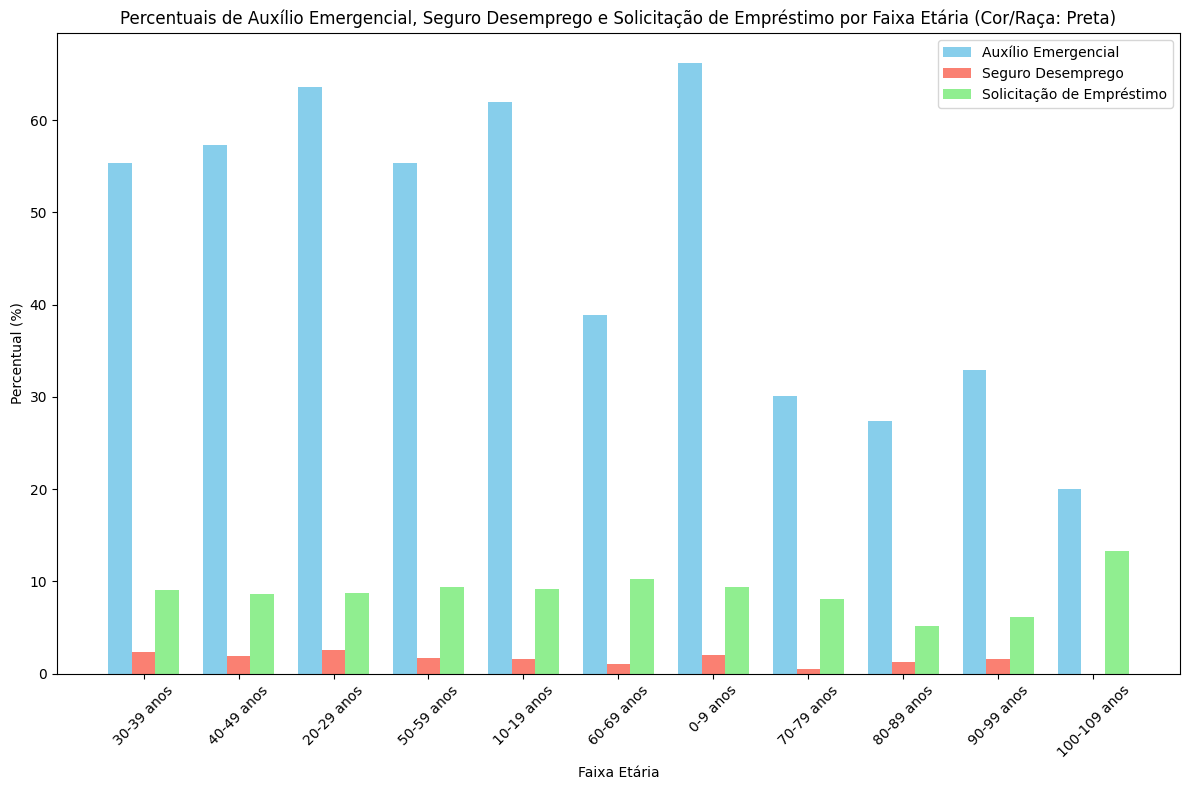

In [ ]:
# Gráfico que compara os percentuais de auxílio emergencial, seguro desemprego e emprestimo por faixa etária
plt.figure(figsize=(12, 8))
bar_width = 0.25
positions = range(len(ts_distribution_pd))
plt.bar(positions, ts_distribution_pd['percentual_auxilios_emergenciais'], width=bar_width, color='skyblue', label='Auxílio Emergencial')
plt.bar([p + bar_width for p in positions], ts_distribution_pd['percentual_auxilios_seguro_desemprego'], width=bar_width, color='salmon', label='Seguro Desemprego')
plt.bar([p + 2 * bar_width for p in positions], ts_distribution_pd['percentual_solicitacao_emprestimo'], width=bar_width, color='lightgreen', label='Solicitação de Empréstimo')
plt.title('Percentuais de Auxílio Emergencial, Seguro Desemprego e Solicitação de Empréstimo por Faixa Etária (Cor/Raça: Preta)')
plt.xlabel('Faixa Etária')
plt.ylabel('Percentual (%)')
plt.xticks([p + bar_width for p in positions], ts_distribution_pd['faixa_etaria'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

Ao observarmos a distribuição da população preta, que foi beneficiada por algum benefício do governo, notamos que existe uma concentração maior de pessoas que solicitaram o auxílio emergencial. Com destaque para a faixa etária de 0-9 anos que alcançou 66,15% na representatividade, quando separamos a faixa de pessoas que receberam apenas um benefício.

In [ ]:
# Registrar DataFrame como uma tabela temporária
pnad_covid_curated.createOrReplaceTempView("pnad_covid")

# Consulta SQL para verificar quem precisou de dinheiro
query = """
SELECT
  faixa_etaria,
  cor_raca,
  COUNT(*) AS count,
  ROUND((COUNT(*) * 100.0 / (SELECT COUNT(*) FROM pnad_covid)), 2) AS percentual,
  ROUND((COUNT(CASE WHEN auxilios_emergenciais = 'Sim' THEN 1 END) * 100.0 / COUNT(*)), 2) AS percentual_auxilios_emergenciais,
  ROUND((COUNT(CASE WHEN seguro_desemprego = 'Sim'THEN 1 END) * 100.0 / COUNT(*)), 2) AS percentual_auxilios_seguro_desemprego,
  ROUND((COUNT(CASE WHEN solicitacao_emprestimo like 'Sim%' THEN 1 END) * 100.0 / COUNT(*)), 2) AS percentual_solicitacao_emprestimo
FROM
    pnad_covid

 WHERE
  cor_raca = 'Preta'

GROUP BY
 faixa_etaria,cor_raca

ORDER BY
  percentual Desc
"""

# Executar a consulta
ts_distribution = spark.sql(query)

# Converter o resultado PySpark para Pandas
ts_distribution_pd = ts_distribution.toPandas()

# Exibir a tabela usando display
from IPython.display import display
display(ts_distribution_pd)

,faixa_etaria,cor_raca,count,percentual,percentual_auxilios_emergenciais,percentual_auxilios_seguro_desemprego,percentual_solicitacao_emprestimo
0,30-39 anos,Preta,15721,1.37,55.40,2.34,9.09
1,40-49 anos,Preta,15327,1.33,57.32,1.86,8.66
2,20-29 anos,Preta,14317,1.25,63.56,2.53,8.68
3,50-59 anos,Preta,13566,1.18,55.35,1.65,9.37
4,10-19 anos,Preta,12059,1.05,61.91,1.56,9.19
5,60-69 anos,Preta,9440,0.82,38.91,1.05,10.23
6,0-9 anos,Preta,7465,0.65,66.15,1.97,9.35
7,70-79 anos,Preta,4398,0.38,30.10,0.45,8.12
8,80-89 anos,Preta,1731,0.15,27.33,1.21,5.14
9,90-99 anos,Preta,392,0.03,32.91,1.53,6.12


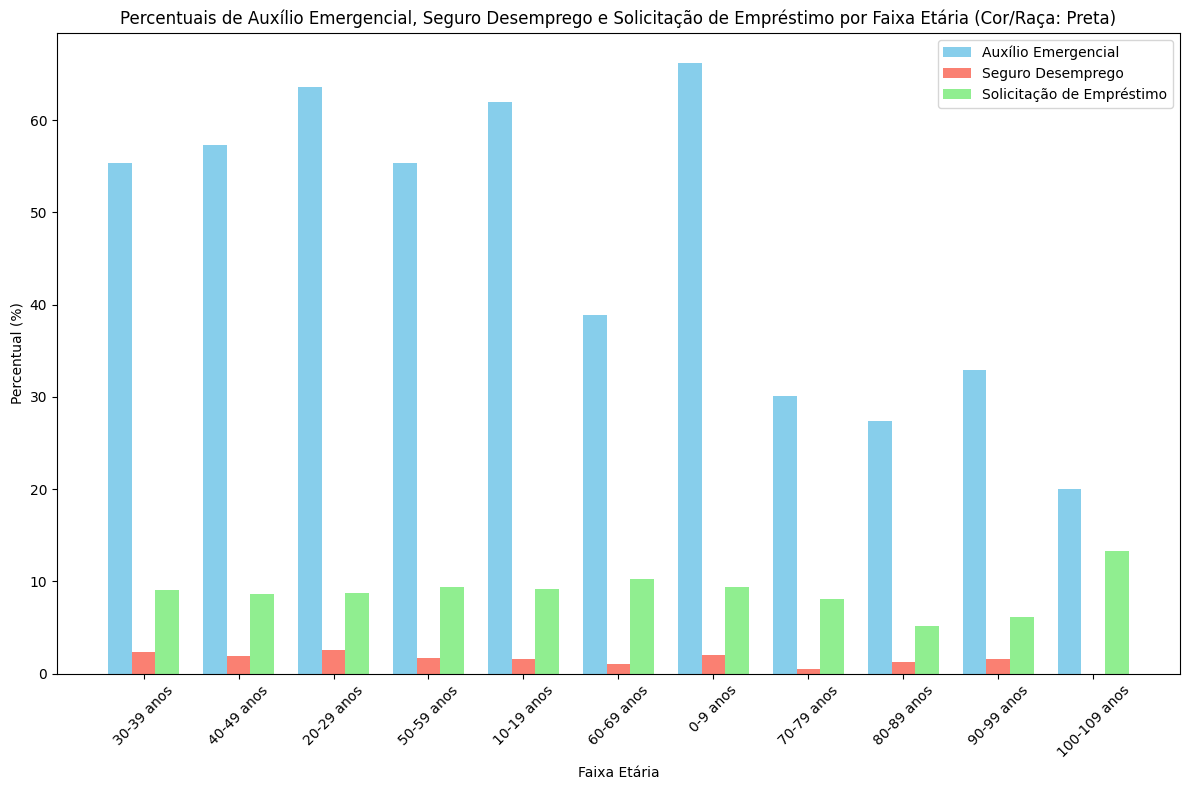

In [ ]:
# Gráfico do percentual de Auxílio Emergencial, Seguro Desemprego e Solicitação de Empréstimo por Faixa Etária (Cor/Raça: Preta)
plt.figure(figsize=(12, 8))
bar_width = 0.25
positions = range(len(ts_distribution_pd))
plt.bar(positions, ts_distribution_pd['percentual_auxilios_emergenciais'], width=bar_width, color='skyblue', label='Auxílio Emergencial')
plt.bar([p + bar_width for p in positions], ts_distribution_pd['percentual_auxilios_seguro_desemprego'], width=bar_width, color='salmon', label='Seguro Desemprego')
plt.bar([p + 2 * bar_width for p in positions], ts_distribution_pd['percentual_solicitacao_emprestimo'], width=bar_width, color='lightgreen', label='Solicitação de Empréstimo')
plt.title('Percentuais de Auxílio Emergencial, Seguro Desemprego e Solicitação de Empréstimo por Faixa Etária (Cor/Raça: Preta)')
plt.xlabel('Faixa Etária')
plt.ylabel('Percentual (%)')
plt.xticks([p + bar_width for p in positions], ts_distribution_pd['faixa_etaria'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

Ao observarmos a distribuição da população preta, que foi beneficiada por algum benefício do governo, notamos que existe uma concentração maior de pessoas que solicitaram o auxílio emergencial. Com destaque para a faixa etária de 0-9 anos que alcançou 66,15% na representatividade, quando separamos a faixa de pessoas que receberam apenas um benefício.

In [ ]:
# Registrar DataFrame como uma tabela temporária
pnad_covid_curated.createOrReplaceTempView("pnad_covid")

# Consulta SQL para verificar quem precisou de dinheiro
query = """
SELECT
  faixa_etaria,
  COUNT(*) AS count,
  ROUND((COUNT(*) * 100.0 / (SELECT COUNT(*) FROM pnad_covid)), 2) AS percentual,
  ROUND((COUNT(CASE WHEN auxilios_emergenciais = 'Nao' and seguro_desemprego = 'Nao' and solicitacao_emprestimo like 'Nao%'THEN 1 END) * 100.0 / COUNT(*)), 2) AS beneficio_nao_concedido,
  ROUND((COUNT(CASE WHEN auxilios_emergenciais = 'Sim' and seguro_desemprego = 'Sim' and solicitacao_emprestimo like 'Sim%'THEN 1 END) * 100.0 / COUNT(*)), 2) AS beneficio_concedido,
  ROUND((COUNT(CASE WHEN auxilios_emergenciais = 'Sim' or seguro_desemprego = 'Sim' or solicitacao_emprestimo like 'Sim%'THEN 1 END) * 100.0 / COUNT(*)), 2) AS um_beneficio_concedido
FROM
    pnad_covid
GROUP BY
 faixa_etaria
ORDER BY
  percentual DESC
"""

# Executar a consulta
fs_distribution = spark.sql(query)

# Converter o resultado PySpark para Pandas
fs_distribution_pd = fs_distribution.toPandas()

# Exibir a tabela usando display
from IPython.display import display
display(fs_distribution_pd)

,faixa_etaria,count,percentual,beneficio_nao_concedido,beneficio_concedido,um_beneficio_concedido
0,10-19 anos,169782,14.77,0.00,0.05,63.63
1,30-39 anos,168787,14.69,0.00,0.06,57.29
2,40-49 anos,164350,14.30,0.00,0.05,56.98
3,20-29 anos,156811,13.65,0.00,0.08,63.21
4,50-59 anos,151259,13.16,0.00,0.04,53.99
5,0-9 anos,135872,11.82,0.00,0.07,65.88
6,60-69 anos,112291,9.77,0.00,0.02,38.30
7,70-79 anos,60819,5.29,0.00,0.00,26.74
8,80-89 anos,24155,2.10,0.00,0.00,26.02
9,90-99 anos,4790,0.42,0.00,0.02,29.10


In [ ]:
# Registrar DataFrame como uma tabela temporária
pnad_covid_curated.createOrReplaceTempView("pnad_covid")

# Consulta SQL para verificar quem precisou de dinheiro
query = """
SELECT
  sexo,
  ROUND((COUNT(*) * 100.0 / (SELECT COUNT(*) FROM pnad_covid)), 2) AS percentual,
  ROUND((COUNT(CASE WHEN auxilios_emergenciais = 'Nao' and seguro_desemprego = 'Nao' and solicitacao_emprestimo like 'Nao%'THEN 1 END) * 100.0 / COUNT(*)), 2) AS beneficio_nao_concedido,
  ROUND((COUNT(CASE WHEN auxilios_emergenciais = 'Sim' and seguro_desemprego = 'Sim' and solicitacao_emprestimo like 'Sim%'THEN 1 END) * 100.0 / COUNT(*)), 2) AS beneficio_concedido,
  ROUND((COUNT(CASE WHEN auxilios_emergenciais = 'Sim' or seguro_desemprego = 'Sim' or solicitacao_emprestimo like 'Sim%'THEN 1 END) * 100.0 / COUNT(*)), 2) AS um_beneficio_concedido
FROM
    pnad_covid
GROUP BY
 sexo
ORDER BY
  percentual DESC
"""

# Executar a consulta
concedido_distribution = spark.sql(query)

# Converter o resultado PySpark para Pandas
concedido_distribution_pd = concedido_distribution.toPandas()

# Exibir a tabela usando display
from IPython.display import display
display(concedido_distribution_pd)

,sexo,percentual,beneficio_nao_concedido,beneficio_concedido,um_beneficio_concedido
0,Feminino,52.08,0.00,0.05,54.88
1,Masculino,47.92,0.00,0.05,55.79


Quando analisamos a separação por sexo e recebimento de benefício, observamos que pessoas do sexo masculino foram contempladas em 55,8% que receberam apenas um benefício.

#8.Considerções Finais

O arquivo contém informações que aparentemente estão ligadas à pesquisa baseada na PNAD-Covid19, com foco na análise de diferentes características da população afetada pela pandemia. A seguir, faço uma análise considerando as três dimensões solicitadas:

1. **Características clínicas dos sintomas**: A análise clínica dos sintomas da Covid-19, com base nos dados fornecidos, pode destacar sintomas comuns como febre, tosse e dificuldade respiratória. Estes sintomas variam de leve a grave, afetando diferentes faixas etárias e grupos de risco, como os idosos e pessoas com comorbidades. Uma observação interessante é a alta prevalência de sintomas leves em jovens, enquanto os grupos mais vulneráveis tendem a apresentar sintomas mais graves, necessitando de internação ou cuidados intensivos.

2. **Características da população**: Os dados demográficos da pesquisa indicam que a pandemia afetou de maneira desproporcional diferentes segmentos da população. Grupos com menor acesso a cuidados de saúde, como populações de baixa renda ou residentes em áreas rurais, mostraram maior incidência de complicações graves. Além disso, observou-se uma desigualdade em termos de raça, gênero e educação, onde populações marginalizadas, como negros e pardos, enfrentaram maiores desafios para acessar serviços de saúde adequados, o que pode ter contribuído para uma maior taxa de mortalidade nesses grupos.

3. **Características econômicas da sociedade**: A pandemia teve um impacto econômico substancial, especialmente em setores informais da economia, onde a maioria das pessoas perdeu o emprego ou teve redução de renda. As famílias de baixa renda, que já enfrentavam insegurança financeira, foram as mais atingidas, agravando ainda mais as desigualdades sociais. Dados econômicos apontam que o aumento do desemprego e a dificuldade de acesso a serviços sociais afetaram diretamente a capacidade das famílias de lidarem com os impactos da doença, levando muitas a situações de pobreza extrema.

**Conclusão**: A correlação entre essas três características revela um ciclo de desigualdade: a vulnerabilidade econômica influencia diretamente o acesso aos cuidados de saúde, exacerbando os efeitos clínicos da Covid-19 em populações mais pobres. Além disso, as características populacionais e a falta de acesso a cuidados de saúde amplificam as dificuldades econômicas, criando um ciclo de pobreza e agravamento dos sintomas entre as populações mais vulneráveis. Assim, é crucial uma abordagem integrada que leve em conta fatores econômicos, sociais e clínicos para mitigar os impactos de futuras crises de saúde pública.
